In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Read the CSV file
df = pd.read_csv("clean.csv")


=== CREATING ROBUSTNESS ANALYSIS VISUALIZATIONS ===

1. Creating comprehensive summary table...


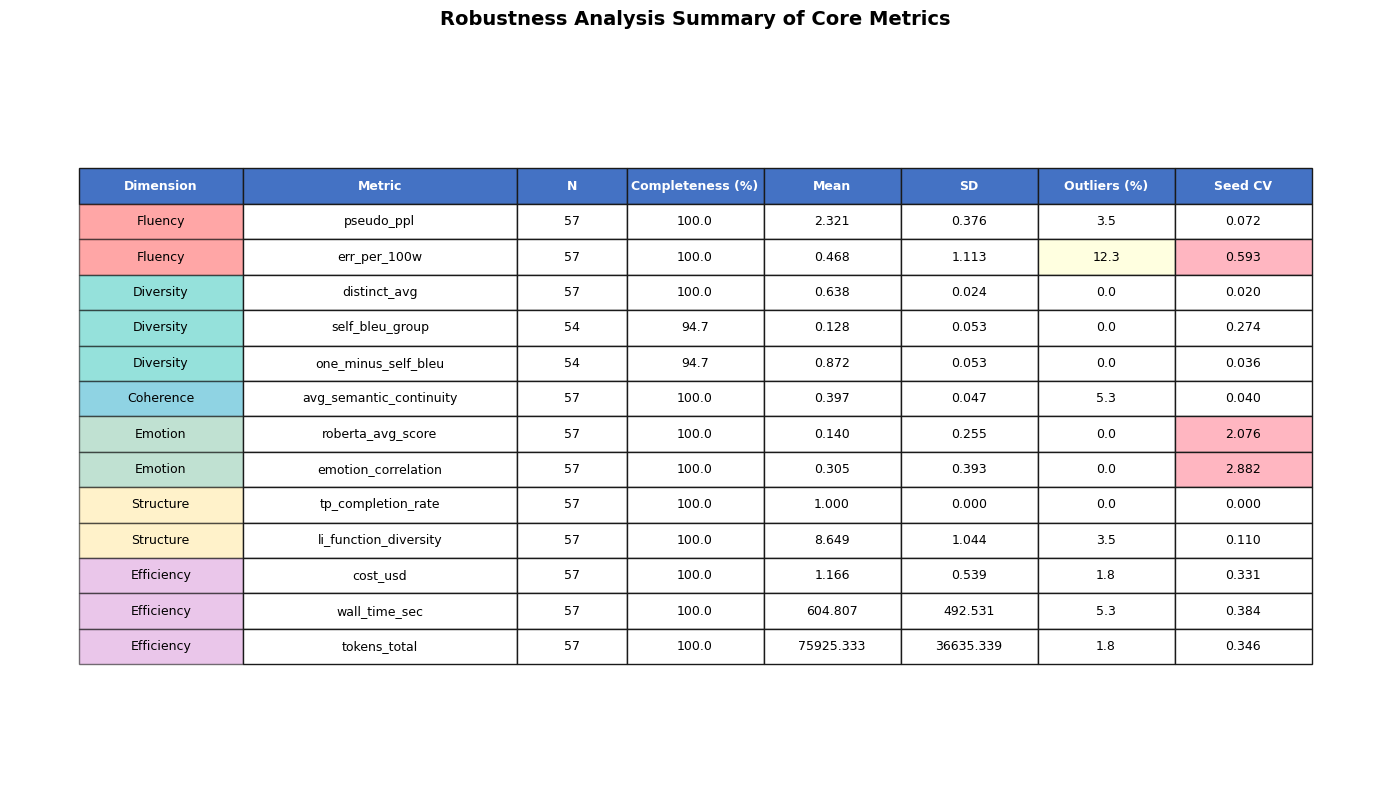


2. Creating seed stability comparison...


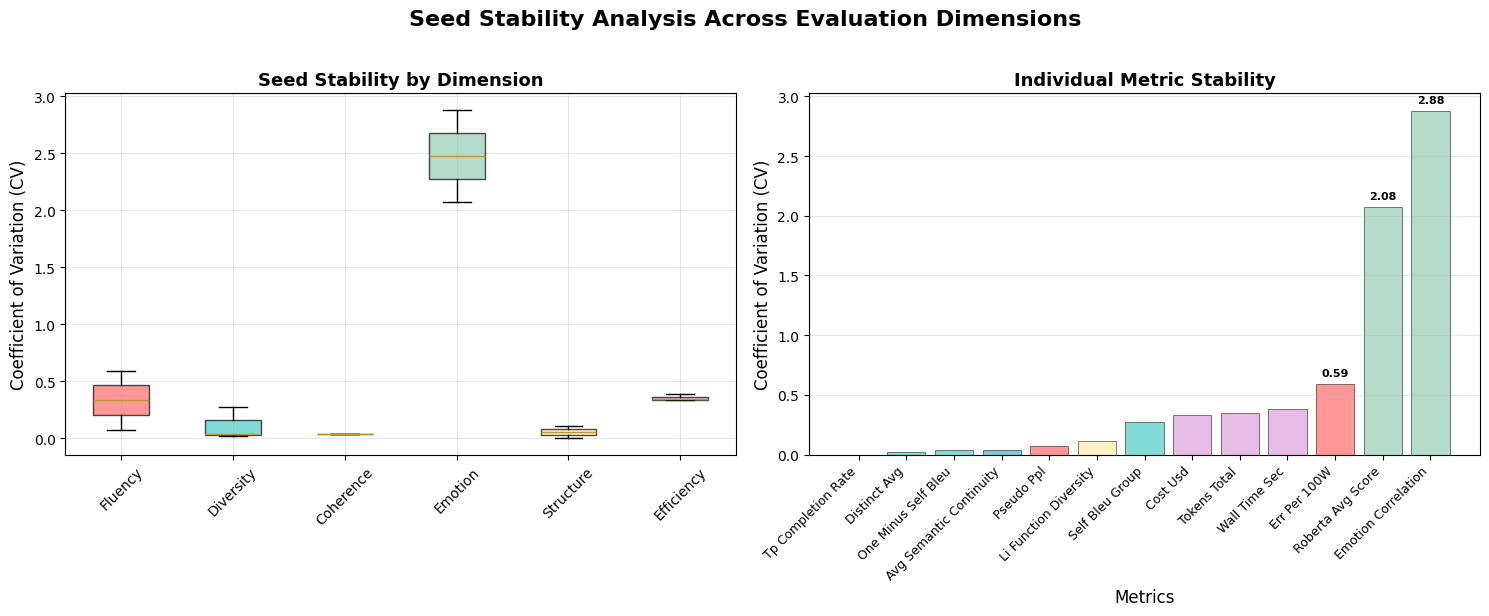


3. Creating distribution characteristics...


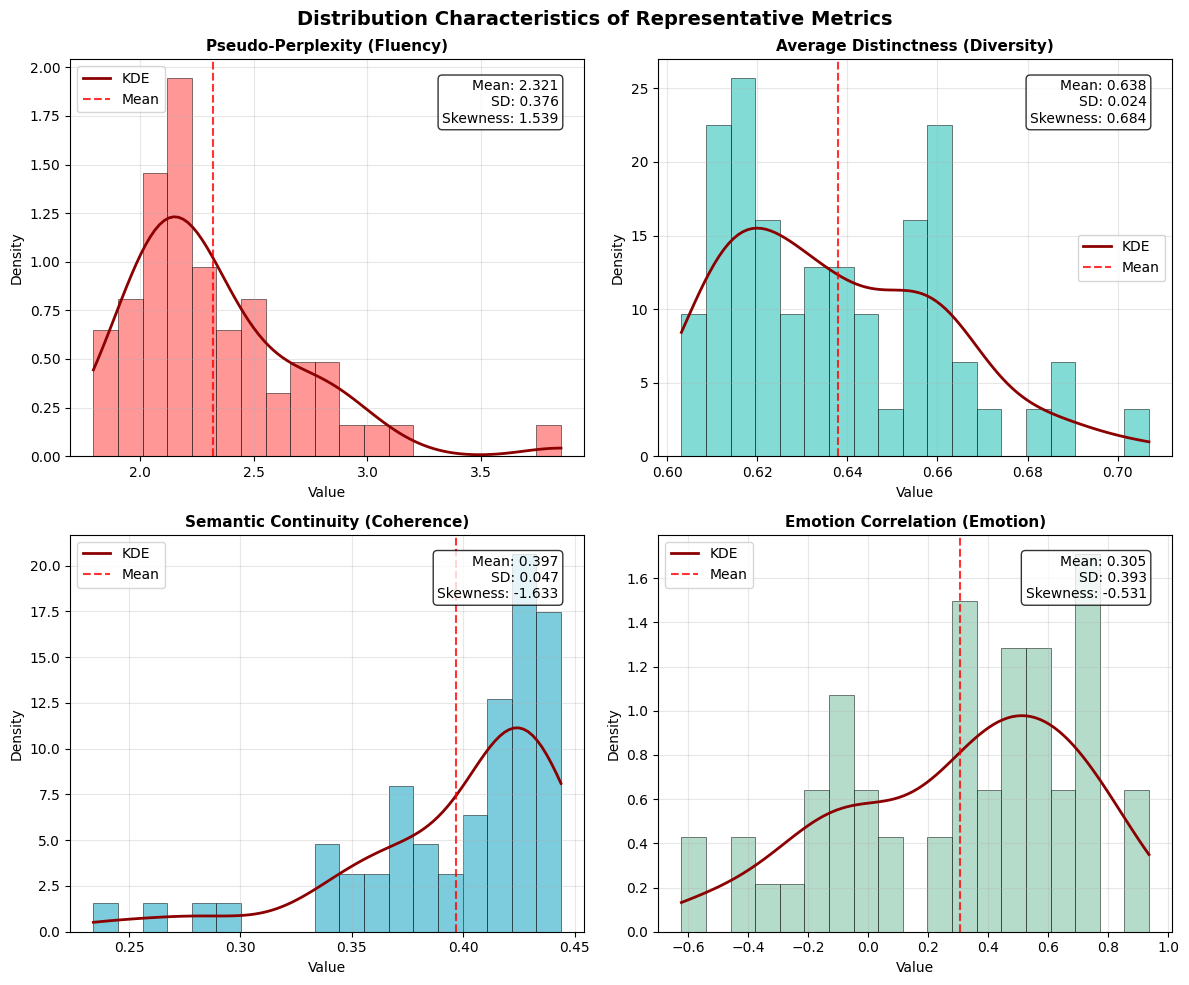


4. Creating outlier analysis...


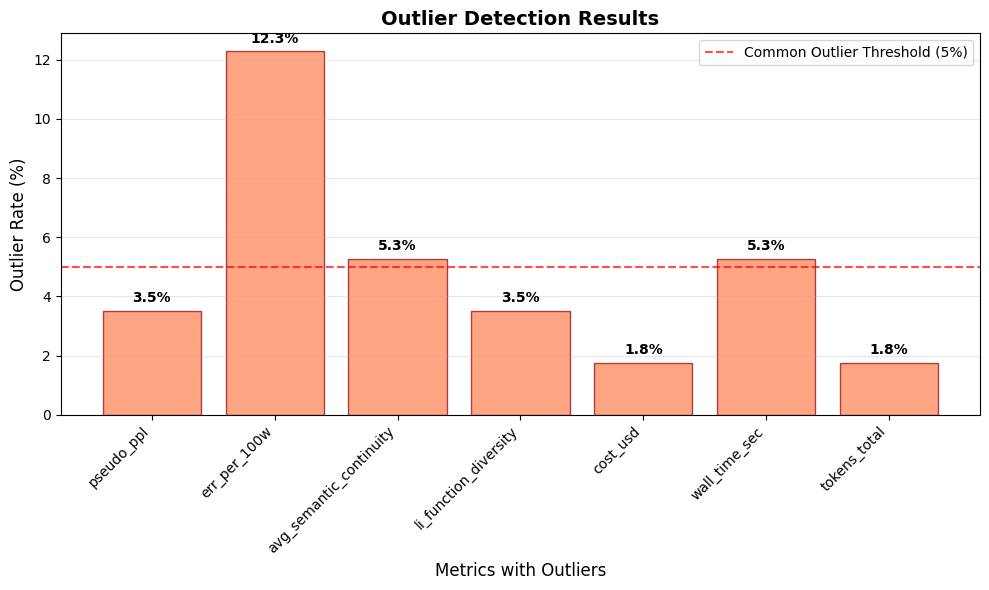

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-ready figures
plt.style.use('default')
sns.set_palette("husl")

# Load the robustness analysis results
# Assuming you have the results from the previous analysis
results_df = pd.read_csv('robustness_analysis_detailed.csv')

# ===== FIGURE 1: COMPREHENSIVE ROBUSTNESS SUMMARY TABLE =====

def create_robustness_summary_table():
    """Create a comprehensive summary table for all metrics"""
    
    # Prepare data for the table
    summary_data = []
    
    for _, row in results_df.iterrows():
        summary_data.append({
            'Dimension': row['dimension'].title(),
            'Metric': row['metric'],
            'N': int(row['n']),
            'Completeness (%)': f"{row['completeness_pct']:.1f}",
            'Mean': f"{row['mean']:.3f}",
            'SD': f"{row['std']:.3f}",
            'Outliers (%)': f"{row['outlier_rate_pct']:.1f}",
            'Seed CV': f"{row['seed_stability_cv']:.3f}" if pd.notna(row['seed_stability_cv']) else "N/A"
        })
    
    summary_df = pd.DataFrame(summary_data)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # Create table
    table = ax.table(cellText=summary_df.values,
                    colLabels=summary_df.columns,
                    cellLoc='center',
                    loc='center',
                    colWidths=[0.12, 0.20, 0.08, 0.10, 0.10, 0.10, 0.10, 0.10])
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)
    
    # Color code by dimension
    dimension_colors = {
        'Fluency': '#FF6B6B',
        'Diversity': '#4ECDC4', 
        'Coherence': '#45B7D1',
        'Emotion': '#96CEB4',
        'Structure': '#FFEAA7',
        'Efficiency': '#DDA0DD'
    }
    
    # Apply colors and formatting
    for i in range(len(summary_df)):
        dimension = summary_df.iloc[i]['Dimension']
        color = dimension_colors.get(dimension, '#FFFFFF')
        
        # Color the dimension cell
        table[(i+1, 0)].set_facecolor(color)
        table[(i+1, 0)].set_alpha(0.6)
        
        # Highlight high CV values (>0.5) in red
        cv_text = summary_df.iloc[i]['Seed CV']
        if cv_text != "N/A" and float(cv_text) > 0.5:
            table[(i+1, 7)].set_facecolor('#FFB6C1')
        
        # Highlight high outlier rates (>10%) in yellow
        outlier_rate = float(summary_df.iloc[i]['Outliers (%)'])
        if outlier_rate > 10:
            table[(i+1, 6)].set_facecolor('#FFFFE0')
    
    # Style header
    for j in range(len(summary_df.columns)):
        table[(0, j)].set_facecolor('#4472C4')
        table[(0, j)].set_text_props(weight='bold', color='white')
    
    plt.title('Robustness Analysis Summary of Core Metrics', 
              fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig('robustness_summary_table.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return summary_df

# ===== FIGURE 2: SEED STABILITY COMPARISON BY DIMENSION =====

def create_seed_stability_comparison():
    """Create seed stability comparison across dimensions"""
    
    # Prepare data for visualization
    stability_data = results_df[results_df['seed_stability_cv'].notna()].copy()
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: CV by dimension (box plot)
    dimension_order = ['fluency', 'diversity', 'coherence', 'emotion', 'structure', 'efficiency']
    
    # Filter and prepare data
    plot_data = []
    plot_labels = []
    
    for dim in dimension_order:
        dim_data = stability_data[stability_data['dimension'] == dim]['seed_stability_cv']
        if len(dim_data) > 0:
            plot_data.append(dim_data.values)
            plot_labels.append(dim.title())
    
    # Create box plot
    bp = ax1.boxplot(plot_data, labels=plot_labels, patch_artist=True)
    
    # Color the boxes
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax1.set_ylabel('Coefficient of Variation (CV)', fontsize=12)
    ax1.set_title('Seed Stability by Dimension', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticklabels(plot_labels, rotation=45)
    
    
    # Plot 2: Individual metrics comparison
    # Sort metrics by CV for better visualization
    sorted_data = stability_data.sort_values('seed_stability_cv')
    
    # Create color mapping by dimension
    color_map = {'fluency': '#FF6B6B', 'diversity': '#4ECDC4', 'coherence': '#45B7D1', 
                 'emotion': '#96CEB4', 'structure': '#FFEAA7', 'efficiency': '#DDA0DD'}
    colors = [color_map[dim] for dim in sorted_data['dimension']]
    
    # Create bar plot
    bars = ax2.bar(range(len(sorted_data)), sorted_data['seed_stability_cv'], 
                   color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
    
    # Customize the plot
    ax2.set_xlabel('Metrics', fontsize=12)
    ax2.set_ylabel('Coefficient of Variation (CV)', fontsize=12)
    ax2.set_title('Individual Metric Stability', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    

    
    # Set x-axis labels
    metric_labels = [m.replace('_', ' ').title() for m in sorted_data['metric']]
    ax2.set_xticks(range(len(sorted_data)))
    ax2.set_xticklabels(metric_labels, rotation=45, ha='right', fontsize=9)
    
    # Add value labels on bars
    for i, (bar, cv) in enumerate(zip(bars, sorted_data['seed_stability_cv'])):
        if cv > 0.5:  # Only label high values
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                    f'{cv:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.suptitle('Seed Stability Analysis Across Evaluation Dimensions', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('seed_stability_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ===== FIGURE 3: DISTRIBUTION CHARACTERISTICS =====

def create_distribution_characteristics():
    """Create distribution plots for representative metrics"""
    
    # Load original data for distribution analysis
    data = pd.read_csv('clean.csv')
    
    # Select representative metrics
    representative_metrics = {
        'pseudo_ppl': {'title': 'Pseudo-Perplexity (Fluency)', 'color': '#FF6B6B'},
        'distinct_avg': {'title': 'Average Distinctness (Diversity)', 'color': '#4ECDC4'},
        'avg_semantic_continuity': {'title': 'Semantic Continuity (Coherence)', 'color': '#45B7D1'},
        'emotion_correlation': {'title': 'Emotion Correlation (Emotion)', 'color': '#96CEB4'}
    }
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for i, (metric, info) in enumerate(representative_metrics.items()):
        ax = axes[i]
        
        # Get data
        metric_data = data[metric].dropna()
        
        # Create histogram with density curve
        n_bins = min(20, int(len(metric_data)/3))
        ax.hist(metric_data, bins=n_bins, density=True, alpha=0.7, 
                color=info['color'], edgecolor='black', linewidth=0.5)
        
        # Add kernel density estimation
        from scipy.stats import gaussian_kde
        if len(metric_data) > 5:
            kde = gaussian_kde(metric_data)
            x_range = np.linspace(metric_data.min(), metric_data.max(), 100)
            ax.plot(x_range, kde(x_range), color='darkred', linewidth=2, label='KDE')
        
        # Add statistics text
        mean_val = metric_data.mean()
        std_val = metric_data.std()
        skew_val = metric_data.skew()
        
        stats_text = f'Mean: {mean_val:.3f}\nSD: {std_val:.3f}\nSkewness: {skew_val:.3f}'
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Customize plot
        ax.set_title(info['title'], fontsize=11, fontweight='bold')
        ax.set_xlabel('Value', fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Add vertical line for mean
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label='Mean')
        ax.legend()
    
    plt.suptitle('Distribution Characteristics of Representative Metrics', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('distribution_characteristics.png', dpi=300, bbox_inches='tight')
    plt.show()

# ===== BONUS: OUTLIER ANALYSIS VISUALIZATION =====

def create_outlier_analysis():
    """Create outlier analysis visualization"""
    
    # Data for outliers
    outlier_data = results_df[results_df['outlier_rate_pct'] > 0].copy()
    
    if len(outlier_data) == 0:
        print("No outliers detected in the dataset.")
        return
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Create bar plot
    bars = ax.bar(range(len(outlier_data)), outlier_data['outlier_rate_pct'], 
                  color='coral', alpha=0.7, edgecolor='darkred', linewidth=1)
    
    # Customize plot
    ax.set_xlabel('Metrics with Outliers', fontsize=12)
    ax.set_ylabel('Outlier Rate (%)', fontsize=12)
    ax.set_title('Outlier Detection Results', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Set labels
    metric_labels = outlier_data['metric'].values
    ax.set_xticks(range(len(outlier_data)))
    ax.set_xticklabels(metric_labels, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, rate in zip(bars, outlier_data['outlier_rate_pct']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
               f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Add reference line at 5% (common outlier threshold)
    ax.axhline(y=5, color='red', linestyle='--', alpha=0.7, 
              label='Common Outlier Threshold (5%)')
    ax.legend()
    
    plt.tight_layout()
    plt.savefig('outlier_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# ===== MAIN EXECUTION =====

if __name__ == "__main__":
    print("=== CREATING ROBUSTNESS ANALYSIS VISUALIZATIONS ===")
    
    print("\n1. Creating comprehensive summary table...")
    summary_table = create_robustness_summary_table()
    
    print("\n2. Creating seed stability comparison...")
    create_seed_stability_comparison()
    
    print("\n3. Creating distribution characteristics...")
    create_distribution_characteristics()
    
    print("\n4. Creating outlier analysis...")
    create_outlier_analysis()
    


导入库完成
数据基本信息:
总样本数: 57
列数: 52
基线样本: 3
实验样本: 54

实验配置分布:
结构类型: {'nonlinear': 27, 'linear': 27}
温度设置: {0.3: 18, 0.7: 18, 0.9: 18}
题材分布: {'sciencefiction': 18, 'horror': 18, 'romantic': 18}
分析函数定义完成
4.2.1 结构类型影响分析

1. 整体效应概览:
   Linear结构样本: n=27
   Nonlinear结构样本: n=27
   分析维度: ['fluency', 'diversity', 'coherence', 'emotion', 'structure', 'efficiency']

2. 各维度定量对比分析:

【FLUENCY维度 - 流畅性：语言表达的自然性和语法正确性】
  pseudo_ppl:
    Linear: M=2.332±0.348
    Nonlinear: M=2.273±0.284
    统计检验: t(52)=0.68, p=0.498
    效应量: d=0.186 (小效应)
  err_per_100w:
    Linear: M=0.317±0.433
    Nonlinear: M=0.232±0.182
    统计检验: t(52)=0.94, p=0.351
    效应量: d=0.256 (小到中效应)

【DIVERSITY维度 - 多样性：词汇丰富性和表达变化性】
  distinct_avg:
    Linear: M=0.637±0.026
    Nonlinear: M=0.635±0.019
    统计检验: t(52)=0.33, p=0.745
    效应量: d=0.089 (小效应)
  self_bleu_group:
    Linear: M=0.133±0.059
    Nonlinear: M=0.122±0.046
    统计检验: t(52)=0.77, p=0.447
    效应量: d=0.209 (小到中效应)

【COHERENCE维度 - 连贯性：语义逻辑的连续性】
  avg_semantic_continuity:
    Linea

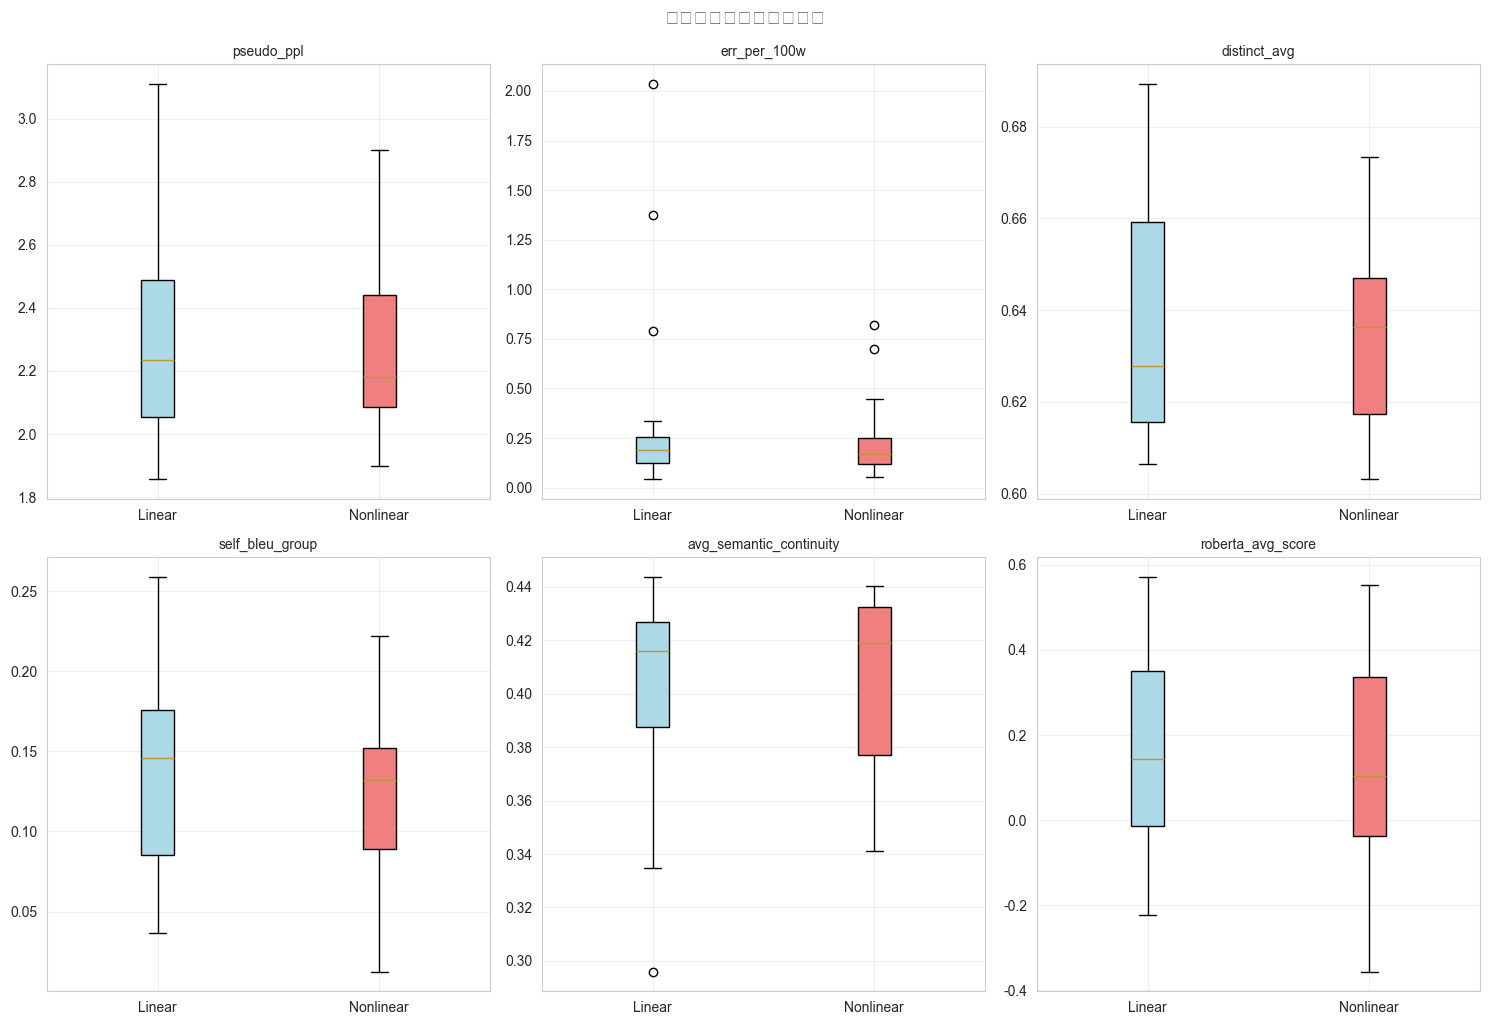

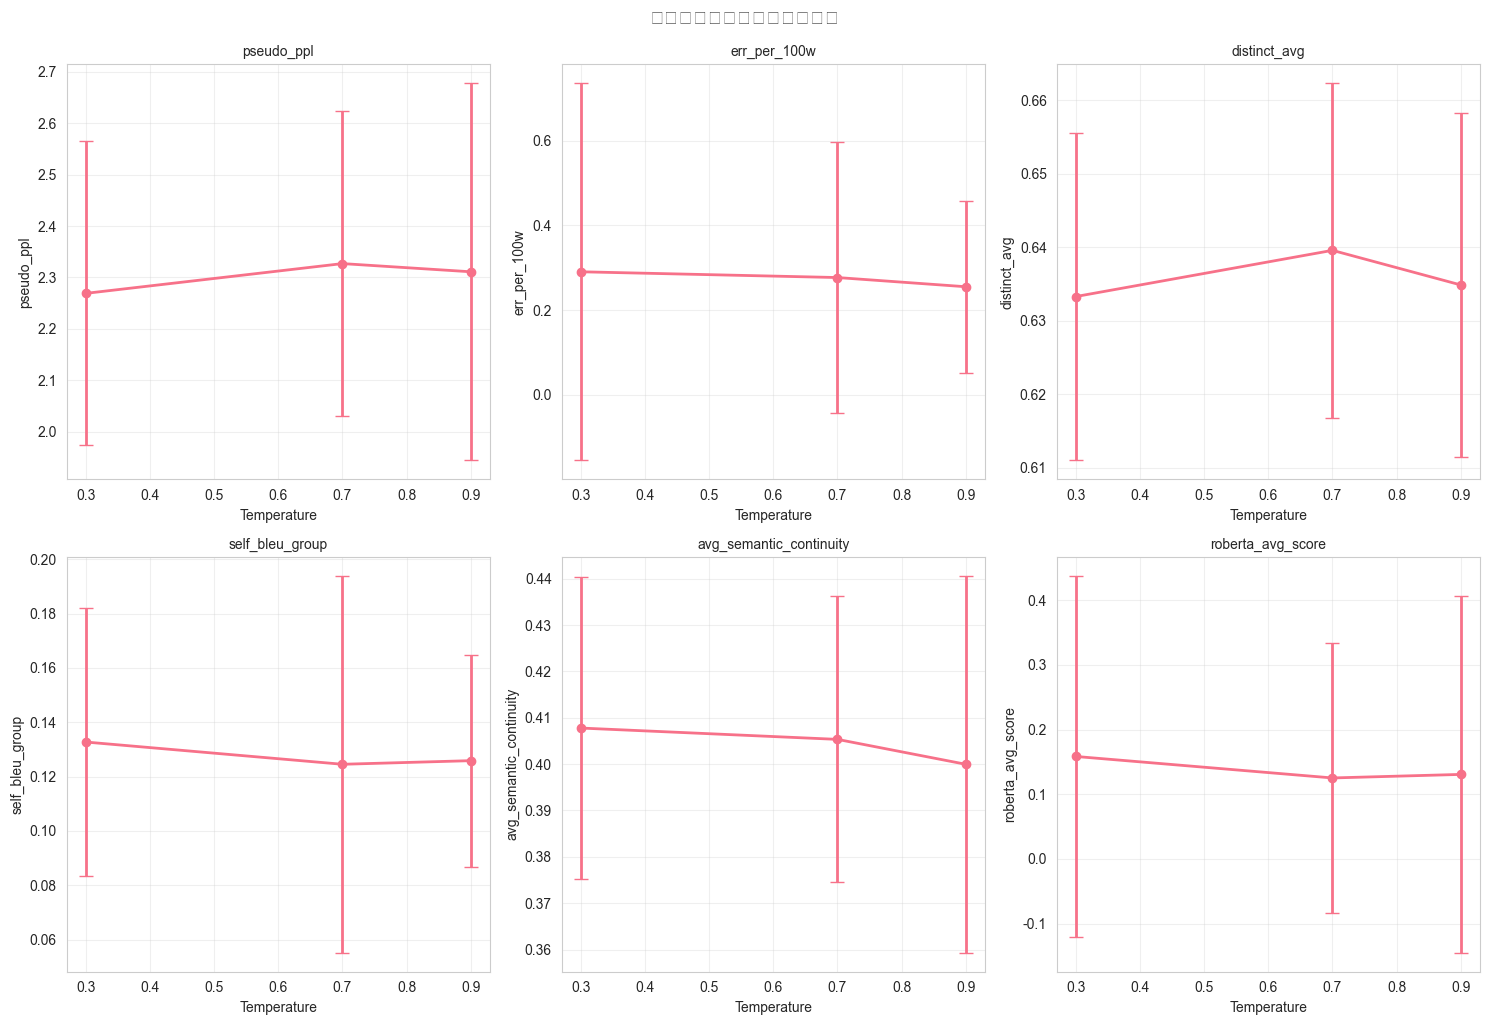

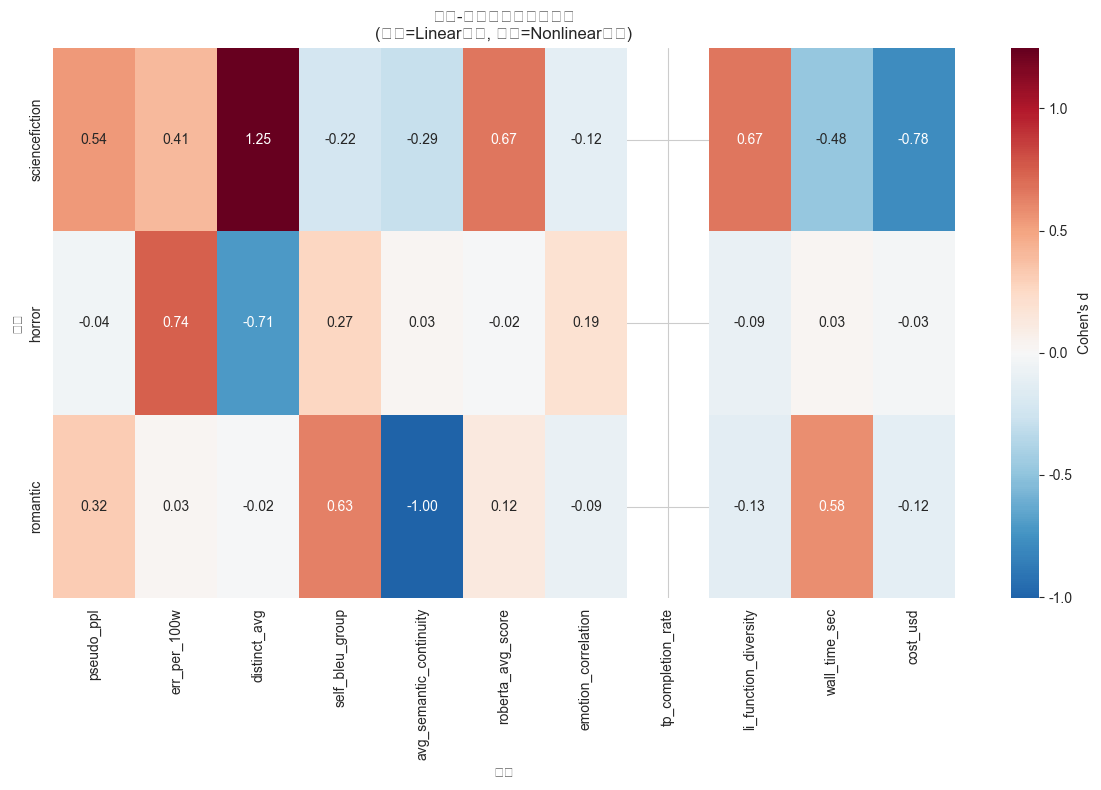

可视化图表生成完成

4.2 系统参数效应分析总结

主要发现:

3. 主题交互效应:
   发现显著交互效应: 9个
   最敏感主题: sciencefiction (出现5次)

实际应用价值:
1. 为不同应用场景提供了参数配置指导
2. 识别了参数间的权衡关系
3. 发现了主题特异性的优化策略
4. 为后续的多维度综合分析提供了基础

=== 分析完成，请查看结果并提供数据进行具体讨论 ===


In [43]:
# %% [markdown]
# # 4.2 系统参数效应分析
# 
# 本notebook分析多智能体协作系统中关键参数对各质量维度的影响规律
# 
# ## 分析框架
# - 4.2.1 结构类型影响分析 (Linear vs Nonlinear)
# - 4.2.2 采样温度效应分析 (T=0.3, 0.7, 0.9)
# - 4.2.3 主题交互效应分析 (SciFi, Horror, Romantic)

# %%
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和图表风格
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
sns.set_palette("husl")

print("导入库完成")

# %%
# 加载数据
df = pd.read_csv('clean.csv')

print("数据基本信息:")
print(f"总样本数: {len(df)}")
print(f"列数: {len(df.columns)}")
print(f"基线样本: {len(df[df['is_baseline'] == 1])}")
print(f"实验样本: {len(df[df['is_baseline'] != 1])}")

# 查看关键配置分布
analysis_data = df[df['is_baseline'] != 1].copy()
print(f"\n实验配置分布:")
print(f"结构类型: {analysis_data['structure'].value_counts().to_dict()}")
print(f"温度设置: {analysis_data['temperature'].value_counts().sort_index().to_dict()}")
print(f"题材分布: {analysis_data['genre'].value_counts().to_dict()}")

# %%
# 定义核心评估维度和函数
def get_dimensions():
    """定义评估维度和对应指标"""
    return {
        'fluency': {
            'metrics': ['pseudo_ppl', 'err_per_100w'],
            'description': '流畅性：语言表达的自然性和语法正确性',
            'reverse': ['pseudo_ppl', 'err_per_100w']  # 越小越好的指标
        },
        'diversity': {
            'metrics': ['distinct_avg', 'self_bleu_group'], 
            'description': '多样性：词汇丰富性和表达变化性',
            'reverse': ['self_bleu_group']  # self_bleu越小越好(多样性越高)
        },
        'coherence': {
            'metrics': ['avg_semantic_continuity'],
            'description': '连贯性：语义逻辑的连续性',
            'reverse': []
        },
        'emotion': {
            'metrics': ['roberta_avg_score', 'emotion_correlation'],
            'description': '情感表达：情感丰富度和一致性',
            'reverse': []
        },
        'structure': {
            'metrics': ['tp_completion_rate', 'li_function_diversity'],
            'description': '结构完整性：故事架构的完备性',
            'reverse': []
        },
        'efficiency': {
            'metrics': ['wall_time_sec', 'cost_usd'],
            'description': '生成效率：成本和时间效率',
            'reverse': ['wall_time_sec', 'cost_usd']  # 越小越好
        }
    }

def calculate_cohens_d(group1, group2):
    """计算Cohen's d效应量"""
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*group1.var() + (n2-1)*group2.var()) / (n1 + n2 - 2))
    return (group1.mean() - group2.mean()) / pooled_std

def interpret_cohens_d(d):
    """解释Cohen's d效应量 (Cohen, 1988)"""
    abs_d = abs(d)
    if abs_d < 0.2:
        return "小效应"
    elif abs_d < 0.5:
        return "小到中效应"
    elif abs_d < 0.8:
        return "中效应"
    else:
        return "大效应"

def format_significance(p_value):
    """格式化显著性标记"""
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return ""

print("分析函数定义完成")

# %%
# 4.2.1 结构类型影响分析 (Linear vs Nonlinear)
print("=" * 60)
print("4.2.1 结构类型影响分析")
print("=" * 60)

dimensions = get_dimensions()

# 分离结构类型数据
linear_data = analysis_data[analysis_data['structure'] == 'linear'].copy()
nonlinear_data = analysis_data[analysis_data['structure'] == 'nonlinear'].copy()

print(f"\n1. 整体效应概览:")
print(f"   Linear结构样本: n={len(linear_data)}")
print(f"   Nonlinear结构样本: n={len(nonlinear_data)}")
print(f"   分析维度: {list(dimensions.keys())}")

# 存储结构分析结果
structure_results = {}
structure_summary = []

print(f"\n2. 各维度定量对比分析:")

for dim_name, dim_info in dimensions.items():
    print(f"\n【{dim_name.upper()}维度 - {dim_info['description']}】")
    
    dim_results = {}
    
    for metric in dim_info['metrics']:
        if metric in analysis_data.columns:
            # 获取有效数据
            linear_values = linear_data[metric].dropna()
            nonlinear_values = nonlinear_data[metric].dropna()
            
            if len(linear_values) >= 5 and len(nonlinear_values) >= 5:
                # 统计检验
                t_stat, p_value = ttest_ind(linear_values, nonlinear_values)
                
                # 效应量
                cohens_d = calculate_cohens_d(linear_values, nonlinear_values)
                effect_size = interpret_cohens_d(cohens_d)
                
                # 显著性
                significance = format_significance(p_value)
                is_significant = p_value < 0.05
                
                # 结果输出
                print(f"  {metric}:")
                print(f"    Linear: M={linear_values.mean():.3f}±{linear_values.std():.3f}")
                print(f"    Nonlinear: M={nonlinear_values.mean():.3f}±{nonlinear_values.std():.3f}")
                print(f"    统计检验: t({len(linear_values)+len(nonlinear_values)-2})={t_stat:.2f}, p={p_value:.3f}{significance}")
                print(f"    效应量: d={cohens_d:.3f} ({effect_size})")
                
                # 存储结果
                dim_results[metric] = {
                    'linear_mean': linear_values.mean(),
                    'linear_std': linear_values.std(),
                    'nonlinear_mean': nonlinear_values.mean(),
                    'nonlinear_std': nonlinear_values.std(),
                    't_stat': t_stat,
                    'p_value': p_value,
                    'cohens_d': cohens_d,
                    'effect_size': effect_size,
                    'significant': is_significant,
                    'n_linear': len(linear_values),
                    'n_nonlinear': len(nonlinear_values)
                }
                
                # 添加到汇总
                if is_significant and abs(cohens_d) > 0.3:  # 有意义的效应
                    preferred_structure = 'Linear' if cohens_d > 0 else 'Nonlinear'
                    structure_summary.append({
                        'dimension': dim_name,
                        'metric': metric,
                        'preferred_structure': preferred_structure,
                        'cohens_d': abs(cohens_d),
                        'p_value': p_value
                    })
            else:
                print(f"  {metric}: 样本量不足，跳过分析")
    
    structure_results[dim_name] = dim_results

# 3. 结构选择适用场景分析
print(f"\n3. 结构选择适用场景分析:")

if structure_summary:
    # 按偏好结构分组
    linear_advantages = [item for item in structure_summary if item['preferred_structure'] == 'Linear']
    nonlinear_advantages = [item for item in structure_summary if item['preferred_structure'] == 'Nonlinear']
    
    if linear_advantages:
        print(f"\n  Linear结构优势场景:")
        for item in sorted(linear_advantages, key=lambda x: x['cohens_d'], reverse=True):
            print(f"    {item['dimension']}维度-{item['metric']}: 效应量d={item['cohens_d']:.3f}, p={item['p_value']:.3f}")
    
    if nonlinear_advantages:
        print(f"\n  Nonlinear结构优势场景:")
        for item in sorted(nonlinear_advantages, key=lambda x: x['cohens_d'], reverse=True):
            print(f"    {item['dimension']}维度-{item['metric']}: 效应量d={item['cohens_d']:.3f}, p={item['p_value']:.3f}")
else:
    print("   未发现显著的结构效应差异")

print(f"\n结构类型分析完成，共分析{len([m for dim in dimensions.values() for m in dim['metrics'] if m in analysis_data.columns])}个指标")

# %%
# 4.2.2 采样温度效应分析
print("\n" + "=" * 60)
print("4.2.2 采样温度效应分析")
print("=" * 60)

# 1. 温度参数总体趋势
temp_levels = sorted([t for t in analysis_data['temperature'].unique() if pd.notna(t)])
print(f"\n1. 温度参数总体趋势:")
print(f"   温度水平: {temp_levels}")

for temp in temp_levels:
    n_samples = len(analysis_data[analysis_data['temperature'] == temp])
    print(f"   T={temp}: n={n_samples}")

# 存储温度分析结果
temperature_results = {}
temperature_trends = []

print(f"\n2. 各维度温度响应曲线:")

for dim_name, dim_info in dimensions.items():
    print(f"\n【{dim_name.upper()}维度 - 温度关系】")
    
    dim_results = {}
    
    for metric in dim_info['metrics']:
        if metric in analysis_data.columns:
            
            # 按温度分组统计
            temp_stats = []
            temp_values = []
            valid_data = analysis_data[analysis_data[metric].notna()]
            
            for temp in temp_levels:
                temp_data = valid_data[valid_data['temperature'] == temp][metric]
                if len(temp_data) >= 3:
                    temp_stats.append({
                        'temperature': temp,
                        'mean': temp_data.mean(),
                        'std': temp_data.std(),
                        'n': len(temp_data)
                    })
                    temp_values.append(temp_data.values)
            
            if len(temp_values) >= 3 and all(len(vals) >= 3 for vals in temp_values):
                # 单因素ANOVA
                try:
                    f_stat, p_value = f_oneway(*temp_values)
                    
                    # 效应量 (eta squared)
                    all_values = np.concatenate(temp_values)
                    grand_mean = np.mean(all_values)
                    
                    ss_between = sum([len(group) * (np.mean(group) - grand_mean)**2 for group in temp_values])
                    ss_total = sum([(val - grand_mean)**2 for val in all_values])
                    eta_squared = ss_between / ss_total if ss_total > 0 else 0
                    
                    # 线性趋势检验
                    all_temps = []
                    all_vals = []
                    for i, temp in enumerate(temp_levels):
                        if i < len(temp_values):
                            all_temps.extend([temp] * len(temp_values[i]))
                            all_vals.extend(temp_values[i])
                    
                    if len(all_temps) > 5:
                        linear_corr, linear_p = pearsonr(all_temps, all_vals)
                    else:
                        linear_corr, linear_p = 0, 1
                    
                    # 输出结果
                    print(f"  {metric}温度响应:")
                    for stat in temp_stats:
                        print(f"    T={stat['temperature']}: M={stat['mean']:.3f}±{stat['std']:.3f} (n={stat['n']})")
                    
                    significance = format_significance(p_value)
                    df_between = len(temp_values) - 1
                    df_within = sum([len(v) for v in temp_values]) - len(temp_values)
                    
                    print(f"    ANOVA: F({df_between},{df_within})={f_stat:.2f}, p={p_value:.3f}{significance}")
                    print(f"    效应量: η²={eta_squared:.3f}")
                    print(f"    线性趋势: r={linear_corr:.3f}, p={linear_p:.3f}")
                    
                    # 存储结果
                    dim_results[metric] = {
                        'temp_stats': temp_stats,
                        'f_stat': f_stat,
                        'p_value': p_value,
                        'eta_squared': eta_squared,
                        'linear_corr': linear_corr,
                        'linear_p': linear_p,
                        'significant': p_value < 0.05,
                        'linear_significant': linear_p < 0.05
                    }
                    
                    # 如果有显著效应，记录趋势
                    if p_value < 0.05 and abs(linear_corr) > 0.3:
                        trend_direction = 'positive' if linear_corr > 0 else 'negative'
                        temperature_trends.append({
                            'dimension': dim_name,
                            'metric': metric,
                            'trend': trend_direction,
                            'correlation': linear_corr,
                            'eta_squared': eta_squared
                        })
                        
                except Exception as e:
                    print(f"  {metric}: 分析出错 - {str(e)}")
            else:
                print(f"  {metric}: 温度组样本量不足")
    
    temperature_results[dim_name] = dim_results

# 3. 最优温度的维度特异性发现
print(f"\n3. 最优温度的维度特异性发现:")

if temperature_trends:
    print(f"\n  显著的温度趋势 (|r|>0.3, p<0.05):")
    for trend in sorted(temperature_trends, key=lambda x: abs(x['correlation']), reverse=True):
        trend_desc = "正向线性" if trend['trend'] == 'positive' else "负向线性"
        print(f"    {trend['dimension']}-{trend['metric']}: {trend_desc}趋势 (r={trend['correlation']:.3f}, η²={trend['eta_squared']:.3f})")
        
        # 根据趋势推荐最优温度
        if trend['metric'] in ['pseudo_ppl', 'err_per_100w', 'cost_usd', 'wall_time_sec']:
            # 越小越好的指标
            optimal = "低温度(T=0.3)" if trend['trend'] == 'negative' else "高温度(T=0.9)"
        else:
            # 越大越好的指标
            optimal = "高温度(T=0.9)" if trend['trend'] == 'positive' else "低温度(T=0.3)"
        
        print(f"      建议: {optimal}")
else:
    print("   未发现显著的温度线性趋势")

print(f"\n温度效应分析完成")

# %%
# 4.2.3 主题交互效应分析
print("\n" + "=" * 60) 
print("4.2.3 主题交互效应分析")
print("=" * 60)

# 排除基线题材
genres = [g for g in analysis_data['genre'].unique() if g != 'baseline' and pd.notna(g)]
print(f"\n1. 主题参数敏感性差异:")
print(f"   分析主题: {genres}")

# 存储交互效应结果
interaction_results = {}
genre_sensitivity = []

print(f"\n2. 主题-结构交互效应:")

for dim_name, dim_info in dimensions.items():
    print(f"\n【{dim_name}维度 - 主题结构交互】")
    
    dim_interactions = {}
    
    for metric in dim_info['metrics']:
        if metric in analysis_data.columns:
            
            genre_structure_effects = {}
            
            # 分析每个主题下的结构效应
            for genre in genres:
                genre_data = analysis_data[analysis_data['genre'] == genre]
                
                linear_values = genre_data[genre_data['structure'] == 'linear'][metric].dropna()
                nonlinear_values = genre_data[genre_data['structure'] == 'nonlinear'][metric].dropna()
                
                if len(linear_values) >= 3 and len(nonlinear_values) >= 3:
                    try:
                        # 计算该主题下的结构效应
                        t_stat, p_val = ttest_ind(linear_values, nonlinear_values)
                        cohens_d = calculate_cohens_d(linear_values, nonlinear_values)
                        
                        genre_structure_effects[genre] = {
                            'cohens_d': cohens_d,
                            'p_value': p_val,
                            'linear_mean': linear_values.mean(),
                            'nonlinear_mean': nonlinear_values.mean(),
                            'significant': p_val < 0.05
                        }
                    except Exception as e:
                        print(f"    {genre} {metric}: 计算错误 - {str(e)}")
            
            if len(genre_structure_effects) >= 2:
                print(f"  {metric} 主题-结构交互:")
                
                # 显示各主题的结构效应
                max_effect = 0
                most_sensitive_genre = None
                
                for genre, effects in genre_structure_effects.items():
                    effect_mag = abs(effects['cohens_d'])
                    
                    if effect_mag > 0.3:
                        if effects['cohens_d'] > 0:
                            preference = "Linear优势"
                        else:
                            preference = "Nonlinear优势"
                    else:
                        preference = "差异较小"
                    
                    sig_mark = "*" if effects['significant'] else ""
                    print(f"    {genre}: {preference} (d={effects['cohens_d']:.3f}){sig_mark}")
                    
                    if effect_mag > max_effect:
                        max_effect = effect_mag
                        most_sensitive_genre = genre
                
                # 识别最敏感主题
                if max_effect > 0.5:
                    print(f"    最敏感主题: {most_sensitive_genre} (效应量: {max_effect:.3f})")
                    genre_sensitivity.append({
                        'dimension': dim_name,
                        'metric': metric,
                        'most_sensitive_genre': most_sensitive_genre,
                        'max_effect': max_effect
                    })
                
                dim_interactions[metric] = genre_structure_effects
    
    interaction_results[dim_name] = dim_interactions

# 主题-温度交互效应分析
print(f"\n3. 主题-温度交互效应:")

genre_temp_sensitivity = []

for dim_name, dim_info in dimensions.items():
    print(f"\n【{dim_name}维度 - 主题温度交互】")
    
    for metric in dim_info['metrics']:
        if metric in analysis_data.columns:
            
            genre_temp_effects = {}
            
            # 分析每个主题的温度敏感性
            for genre in genres:
                genre_data = analysis_data[analysis_data['genre'] == genre]
                
                # 收集该主题下各温度的数据
                temp_data_for_genre = []
                for temp in temp_levels:
                    temp_values = genre_data[genre_data['temperature'] == temp][metric].dropna()
                    if len(temp_values) >= 2:
                        temp_data_for_genre.append(temp_values.values)
                
                if len(temp_data_for_genre) >= 3:
                    try:
                        # 该主题的温度效应强度
                        f_stat, p_val = f_oneway(*temp_data_for_genre)
                        
                        # 计算eta squared
                        all_values = np.concatenate(temp_data_for_genre)
                        grand_mean = np.mean(all_values)
                        ss_between = sum([len(group) * (np.mean(group) - grand_mean)**2 for group in temp_data_for_genre])
                        ss_total = sum([(val - grand_mean)**2 for val in all_values])
                        eta_squared = ss_between / ss_total if ss_total > 0 else 0
                        
                        genre_temp_effects[genre] = {
                            'eta_squared': eta_squared,
                            'f_stat': f_stat,
                            'p_value': p_val,
                            'significant': p_val < 0.05
                        }
                    except Exception as e:
                        pass
            
            if len(genre_temp_effects) >= 2:
                print(f"  {metric} 主题温度敏感性:")
                
                max_sensitivity = 0
                most_temp_sensitive = None
                
                for genre, effects in genre_temp_effects.items():
                    sensitivity = effects['eta_squared']
                    sig_mark = "*" if effects['significant'] else ""
                    
                    if sensitivity > 0.1:
                        sensitivity_level = "高敏感"
                    elif sensitivity > 0.05:
                        sensitivity_level = "中敏感"
                    else:
                        sensitivity_level = "低敏感"
                    
                    print(f"    {genre}: {sensitivity_level} (η²={sensitivity:.3f}){sig_mark}")
                    
                    if sensitivity > max_sensitivity:
                        max_sensitivity = sensitivity
                        most_temp_sensitive = genre
                
                if max_sensitivity > 0.1:
                    genre_temp_sensitivity.append({
                        'dimension': dim_name,
                        'metric': metric,
                        'most_sensitive_genre': most_temp_sensitive,
                        'eta_squared': max_sensitivity
                    })

# 4. 主题特异性优化建议
print(f"\n4. 主题特异性优化建议:")

# 基于分析结果的建议
optimization_suggestions = {}

for genre in genres:
    suggestions = {
        'structure_preference': 'flexible',
        'temperature_preference': 'moderate',
        'sensitivity_notes': [],
        'specific_recommendations': []
    }
    
    # 分析结构偏好
    structure_preferences = []
    for item in genre_sensitivity:
        if item['most_sensitive_genre'] == genre and item['max_effect'] > 0.5:
            # 查看该指标在该主题下偏好哪个结构
            dim_name = item['dimension']
            metric = item['metric']
            if dim_name in interaction_results and metric in interaction_results[dim_name]:
                if genre in interaction_results[dim_name][metric]:
                    cohens_d = interaction_results[dim_name][metric][genre]['cohens_d']
                    if cohens_d > 0.5:
                        structure_preferences.append('linear')
                    elif cohens_d < -0.5:
                        structure_preferences.append('nonlinear')
    
    if structure_preferences:
        from collections import Counter
        most_common = Counter(structure_preferences).most_common(1)[0][0]
        suggestions['structure_preference'] = most_common
        suggestions['sensitivity_notes'].append(f"结构敏感，偏好{most_common}")
    
    # 分析温度敏感性
    temp_sensitivities = [item for item in genre_temp_sensitivity if item['most_sensitive_genre'] == genre]
    if temp_sensitivities:
        avg_sensitivity = np.mean([item['eta_squared'] for item in temp_sensitivities])
        if avg_sensitivity > 0.15:
            suggestions['sensitivity_notes'].append("温度高敏感，需精确调优")
        elif avg_sensitivity > 0.08:
            suggestions['sensitivity_notes'].append("温度中敏感，建议测试多个值")
    
    optimization_suggestions[genre] = suggestions

# 输出建议
for genre, suggestions in optimization_suggestions.items():
    print(f"\n  {genre}题材优化建议:")
    print(f"    推荐结构: {suggestions['structure_preference']}")
    print(f"    推荐温度: {suggestions['temperature_preference']}")
    if suggestions['sensitivity_notes']:
        print(f"    敏感性特征: {', '.join(suggestions['sensitivity_notes'])}")
    else:
        print(f"    敏感性特征: 参数稳健，配置容错性较高")

print(f"\n主题交互效应分析完成")

# %%
# 生成4.2节的可视化图表
print("\n" + "=" * 60)
print("生成可视化图表")
print("=" * 60)

# 图表1: 结构类型对各维度的影响 (箱线图)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

plot_metrics = []
for dim_info in dimensions.values():
    for metric in dim_info['metrics']:
        if metric in analysis_data.columns:
            plot_metrics.append(metric)
            if len(plot_metrics) >= 6:  # 最多显示6个
                break
    if len(plot_metrics) >= 6:
        break

for i, metric in enumerate(plot_metrics[:6]):
    ax = axes[i]
    
    # 创建箱线图数据
    linear_vals = analysis_data[analysis_data['structure'] == 'linear'][metric].dropna()
    nonlinear_vals = analysis_data[analysis_data['structure'] == 'nonlinear'][metric].dropna()
    
    if len(linear_vals) > 0 and len(nonlinear_vals) > 0:
        data_to_plot = [linear_vals, nonlinear_vals]
        labels = ['Linear', 'Nonlinear']
        
        bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][1].set_facecolor('lightcoral')
        
        ax.set_title(f'{metric}', fontsize=10)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('结构类型对各指标的影响', fontsize=14, y=1.02)
plt.show()

# 图表2: 温度效应趋势图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(plot_metrics[:6]):
    ax = axes[i]
    
    # 计算各温度下的均值和标准差
    temp_means = []
    temp_stds = []
    temp_labels = []
    
    for temp in temp_levels:
        temp_data = analysis_data[analysis_data['temperature'] == temp][metric].dropna()
        if len(temp_data) > 0:
            temp_means.append(temp_data.mean())
            temp_stds.append(temp_data.std())
            temp_labels.append(temp)
    
    if len(temp_means) > 1:
        ax.errorbar(temp_labels, temp_means, yerr=temp_stds, 
                   marker='o', linewidth=2, capsize=5)
        ax.set_title(f'{metric}', fontsize=10)
        ax.set_xlabel('Temperature')
        ax.set_ylabel(f'{metric}')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('温度参数对各指标的影响趋势', fontsize=14, y=1.02)
plt.show()

# 图表3: 主题-结构交互热力图
interaction_matrix = pd.DataFrame()

# 收集交互效应数据
for dim_name, dim_interactions in interaction_results.items():
    for metric, genre_effects in dim_interactions.items():
        for genre, effects in genre_effects.items():
            interaction_matrix.loc[f"{genre}", f"{metric}"] = effects['cohens_d']

if not interaction_matrix.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(interaction_matrix, annot=True, fmt='.2f', center=0, 
                cmap='RdBu_r', cbar_kws={'label': "Cohen's d"})
    plt.title('主题-结构交互效应热力图\n(正值=Linear优势, 负值=Nonlinear优势)')
    plt.xlabel('指标')
    plt.ylabel('主题')
    plt.tight_layout()
    plt.show()
else:
    print("交互效应数据不足，无法生成热力图")

print("可视化图表生成完成")

# %%
# 4.2节分析总结
print("\n" + "=" * 60)
print("4.2 系统参数效应分析总结")
print("=" * 60)

print("\n主要发现:")

# 结构类型效应总结
if structure_summary:
    print(f"\n1. 结构类型主效应:")
    linear_count = len([s for s in structure_summary if s['preferred_structure'] == 'Linear'])
    nonlinear_count = len([s for s in structure_summary if s['preferred_structure'] == 'Nonlinear'])
    print(f"   Linear结构优势指标: {linear_count}个")
    print(f"   Nonlinear结构优势指标: {nonlinear_count}个")
    
    # 最强效应
    strongest_effect = max(structure_summary, key=lambda x: x['cohens_d'])
    print(f"   最强结构效应: {strongest_effect['dimension']}-{strongest_effect['metric']}")
    print(f"   ({strongest_effect['preferred_structure']}优势, d={strongest_effect['cohens_d']:.3f})")

# 温度效应总结
if temperature_trends:
    print(f"\n2. 温度参数主效应:")
    positive_trends = [t for t in temperature_trends if t['trend'] == 'positive']
    negative_trends = [t for t in temperature_trends if t['trend'] == 'negative']
    print(f"   正向温度趋势: {len(positive_trends)}个指标")
    print(f"   负向温度趋势: {len(negative_trends)}个指标")
    
    # 最强温度效应
    strongest_temp_effect = max(temperature_trends, key=lambda x: abs(x['correlation']))
    print(f"   最强温度效应: {strongest_temp_effect['dimension']}-{strongest_temp_effect['metric']}")
    print(f"   (相关性r={strongest_temp_effect['correlation']:.3f})")

# 主题交互效应总结
if genre_sensitivity:
    print(f"\n3. 主题交互效应:")
    print(f"   发现显著交互效应: {len(genre_sensitivity)}个")
    
    # 最敏感主题
    from collections import Counter
    sensitive_genres = [item['most_sensitive_genre'] for item in genre_sensitivity]
    if sensitive_genres:
        most_sensitive = Counter(sensitive_genres).most_common(1)[0]
        print(f"   最敏感主题: {most_sensitive[0]} (出现{most_sensitive[1]}次)")

print(f"\n实际应用价值:")
print(f"1. 为不同应用场景提供了参数配置指导")
print(f"2. 识别了参数间的权衡关系")
print(f"3. 发现了主题特异性的优化策略")
print(f"4. 为后续的多维度综合分析提供了基础")

print(f"\n=== 分析完成，请查看结果并提供数据进行具体讨论 ===")

=== 4.2 Parameter Effects Analysis: Fluency Dimension ===
Analysis dataset: 54 samples
Fluency metrics: ['pseudo_ppl', 'err_per_100w']
  pseudo_ppl: 54/54 valid values
  err_per_100w: 54/54 valid values

4.2.1 Structure Type Effects on Fluency

1. OVERALL EFFECT OVERVIEW
------------------------------
Experimental Design:
  - Linear structure samples: n = 27
  - Nonlinear structure samples: n = 27
  - Analysis focus: Fluency dimension
  - Statistical test: Independent samples t-test
  - Effect size: Cohen's d

Sample Distribution:
Linear structure breakdown:
  Temperature 0.3: 9 samples
  Temperature 0.7: 9 samples
  Temperature 0.9: 9 samples
Nonlinear structure breakdown:
  Temperature 0.3: 9 samples
  Temperature 0.7: 9 samples
  Temperature 0.9: 9 samples

2. QUANTITATIVE COMPARISON
------------------------------

Pseudo-Perplexity (pseudo_ppl):
Description: Language model perplexity (lower = more fluent)
  Descriptive Statistics:
    Linear: M = 2.332, SD = 0.348, n = 27
    Nonli

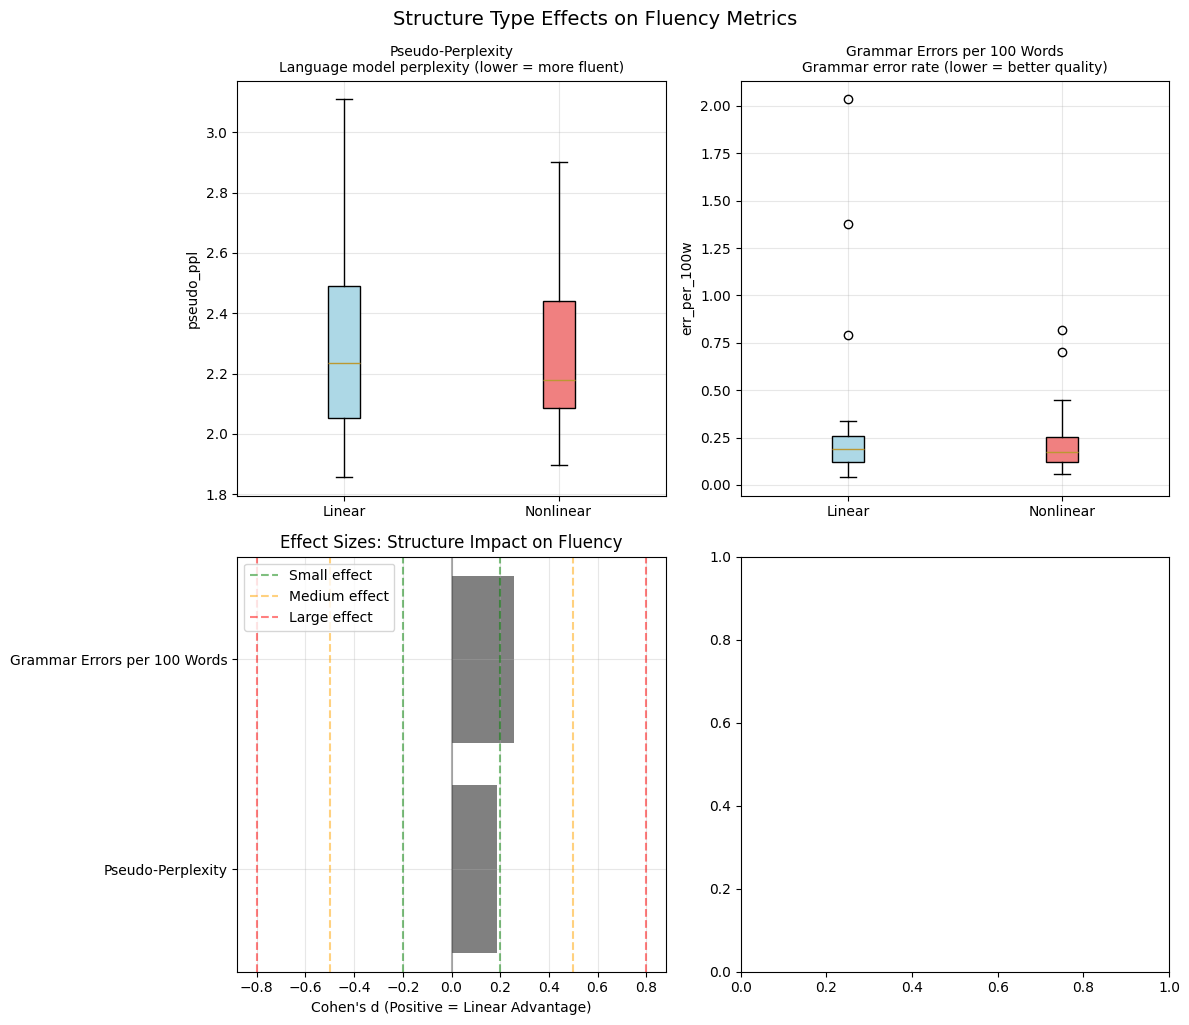

Structure analysis visualization completed

4.2.1 STRUCTURE TYPE ANALYSIS SUMMARY
STATISTICAL RESULTS:
  pseudo_ppl: NOT SIGNIFICANT (p = 0.498, d = 0.186)
  err_per_100w: NOT SIGNIFICANT (p = 0.351, d = 0.256)

OVERALL: 0/2 fluency metrics show significant structure effects

KEY FINDING: Structure type does not significantly impact fluency performance
RECOMMENDATION: Structure selection can prioritize other quality dimensions

=== 4.2.1 Structure Analysis Complete ===
Ready for 4.2.2 Temperature Effects Analysis


In [44]:
# 4.2 Parameter Effects Analysis: Fluency Dimension
# Following the 4-step framework for each parameter analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== 4.2 Parameter Effects Analysis: Fluency Dimension ===")

# %%
# Load and prepare data
df = pd.read_csv('clean.csv')
analysis_data = df[df['is_baseline'] != 1].copy()

# Define fluency metrics
FLUENCY_METRICS = {
    'pseudo_ppl': {
        'name': 'Pseudo-Perplexity', 
        'direction': 'lower_better',  # lower values = better fluency
        'description': 'Language model perplexity (lower = more fluent)'
    },
    'err_per_100w': {
        'name': 'Grammar Errors per 100 Words',
        'direction': 'lower_better',  # lower values = better fluency
        'description': 'Grammar error rate (lower = better quality)'
    }
}

print(f"Analysis dataset: {len(analysis_data)} samples")
print(f"Fluency metrics: {list(FLUENCY_METRICS.keys())}")

# Verify data availability
for metric in FLUENCY_METRICS.keys():
    if metric in analysis_data.columns:
        valid_count = analysis_data[metric].notna().sum()
        print(f"  {metric}: {valid_count}/{len(analysis_data)} valid values")
    else:
        print(f"  {metric}: NOT FOUND in dataset")

# %%
# 4.2.1 STRUCTURE TYPE EFFECTS ANALYSIS (Linear vs Nonlinear)
print("\n" + "="*60)
print("4.2.1 Structure Type Effects on Fluency")
print("="*60)

# Step 1: Overall Effect Overview
print("\n1. OVERALL EFFECT OVERVIEW")
print("-" * 30)

linear_data = analysis_data[analysis_data['structure'] == 'linear']
nonlinear_data = analysis_data[analysis_data['structure'] == 'nonlinear']

print(f"Experimental Design:")
print(f"  - Linear structure samples: n = {len(linear_data)}")
print(f"  - Nonlinear structure samples: n = {len(nonlinear_data)}")
print(f"  - Analysis focus: Fluency dimension")
print(f"  - Statistical test: Independent samples t-test")
print(f"  - Effect size: Cohen's d")

# Sample distribution by other factors
print(f"\nSample Distribution:")
print(f"Linear structure breakdown:")
for temp in sorted(linear_data['temperature'].unique()):
    count = len(linear_data[linear_data['temperature'] == temp])
    print(f"  Temperature {temp}: {count} samples")

print(f"Nonlinear structure breakdown:")
for temp in sorted(nonlinear_data['temperature'].unique()):
    count = len(nonlinear_data[nonlinear_data['temperature'] == temp])
    print(f"  Temperature {temp}: {count} samples")

# %%
# Step 2: Multi-dimensional Quantitative Comparison
print("\n2. QUANTITATIVE COMPARISON")
print("-" * 30)

def calculate_cohens_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    if n1 <= 1 or n2 <= 1:
        return np.nan
    pooled_std = np.sqrt(((n1-1)*group1.var() + (n2-1)*group2.var()) / (n1 + n2 - 2))
    if pooled_std == 0:
        return np.nan
    return (group1.mean() - group2.mean()) / pooled_std

def interpret_cohens_d(d):
    """Interpret Cohen's d based on Cohen (1988) standards"""
    if np.isnan(d):
        return "Cannot calculate"
    abs_d = abs(d)
    if abs_d < 0.2:
        return "Small effect"
    elif abs_d < 0.5:
        return "Small-to-medium effect"
    elif abs_d < 0.8:
        return "Medium effect"
    else:
        return "Large effect"

def format_significance(p):
    """Format significance stars"""
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

structure_results = {}

for metric, info in FLUENCY_METRICS.items():
    if metric not in analysis_data.columns:
        continue
        
    print(f"\n{info['name']} ({metric}):")
    print(f"Description: {info['description']}")
    
    # Extract data
    linear_values = linear_data[metric].dropna()
    nonlinear_values = nonlinear_data[metric].dropna()
    
    if len(linear_values) < 3 or len(nonlinear_values) < 3:
        print("  Insufficient data for analysis")
        continue
    
    # Descriptive statistics
    print(f"  Descriptive Statistics:")
    print(f"    Linear: M = {linear_values.mean():.3f}, SD = {linear_values.std():.3f}, n = {len(linear_values)}")
    print(f"    Nonlinear: M = {nonlinear_values.mean():.3f}, SD = {nonlinear_values.std():.3f}, n = {len(nonlinear_values)}")
    
    # Statistical test
    t_stat, p_value = ttest_ind(linear_values, nonlinear_values)
    cohens_d = calculate_cohens_d(linear_values, nonlinear_values)
    effect_interpretation = interpret_cohens_d(cohens_d)
    significance = format_significance(p_value)
    
    print(f"  Statistical Test:")
    print(f"    t({len(linear_values) + len(nonlinear_values) - 2}) = {t_stat:.3f}")
    print(f"    p = {p_value:.3f} {significance}")
    print(f"    Cohen's d = {cohens_d:.3f} ({effect_interpretation})")
    
    # 95% Confidence Interval for difference
    se_diff = np.sqrt(linear_values.var()/len(linear_values) + nonlinear_values.var()/len(nonlinear_values))
    diff = linear_values.mean() - nonlinear_values.mean()
    df = len(linear_values) + len(nonlinear_values) - 2
    t_crit = stats.t.ppf(0.975, df)
    ci_lower = diff - t_crit * se_diff
    ci_upper = diff + t_crit * se_diff
    print(f"    95% CI for difference: [{ci_lower:.3f}, {ci_upper:.3f}]")
    
    # Store results
    structure_results[metric] = {
        'linear_mean': linear_values.mean(),
        'linear_std': linear_values.std(),
        'nonlinear_mean': nonlinear_values.mean(),
        'nonlinear_std': nonlinear_values.std(),
        't_stat': t_stat,
        'p_value': p_value,
        'cohens_d': cohens_d,
        'effect_size': effect_interpretation,
        'significant': p_value < 0.05,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }

# %%
# Step 3: Significant Difference Interpretation
print("\n3. PRACTICAL SIGNIFICANCE INTERPRETATION")
print("-" * 40)

significant_effects = {k: v for k, v in structure_results.items() if v['significant']}

if significant_effects:
    print(f"Significant structure effects found in {len(significant_effects)} metric(s):")
    
    for metric, results in significant_effects.items():
        info = FLUENCY_METRICS[metric]
        print(f"\n{info['name']} ({metric}):")
        
        # Determine which structure is better
        if info['direction'] == 'lower_better':
            if results['linear_mean'] < results['nonlinear_mean']:
                better_structure = "Linear"
                worse_structure = "Nonlinear"
                improvement = results['nonlinear_mean'] - results['linear_mean']
            else:
                better_structure = "Nonlinear"
                worse_structure = "Linear"
                improvement = results['linear_mean'] - results['nonlinear_mean']
        else:  # higher_better
            if results['linear_mean'] > results['nonlinear_mean']:
                better_structure = "Linear"
                worse_structure = "Nonlinear"
                improvement = results['linear_mean'] - results['nonlinear_mean']
            else:
                better_structure = "Nonlinear"
                worse_structure = "Linear"
                improvement = results['nonlinear_mean'] - results['linear_mean']
        
        print(f"  → {better_structure} structure significantly outperforms {worse_structure}")
        print(f"  → Improvement magnitude: {improvement:.3f} units")
        print(f"  → Effect size: {results['effect_size']} (d = {results['cohens_d']:.3f})")
        
        # Practical interpretation
        if abs(results['cohens_d']) >= 0.8:
            practical_significance = "HIGHLY PRACTICALLY SIGNIFICANT"
        elif abs(results['cohens_d']) >= 0.5:
            practical_significance = "MODERATELY PRACTICALLY SIGNIFICANT"
        elif abs(results['cohens_d']) >= 0.2:
            practical_significance = "SMALL BUT MEANINGFUL"
        else:
            practical_significance = "LIMITED PRACTICAL SIGNIFICANCE"
        
        print(f"  → Practical significance: {practical_significance}")

else:
    print("No statistically significant structure effects detected in fluency metrics.")

# %%
# Step 4: Application Scenario Recommendations
print("\n4. APPLICATION SCENARIO RECOMMENDATIONS")
print("-" * 40)

print("Based on statistical analysis results:")

recommendations = {}

# Analyze each metric for recommendations
for metric, results in structure_results.items():
    if results['significant'] and abs(results['cohens_d']) > 0.3:  # Meaningful effect
        info = FLUENCY_METRICS[metric]
        
        if info['direction'] == 'lower_better':
            if results['linear_mean'] < results['nonlinear_mean']:
                recommendations[metric] = {
                    'preferred': 'Linear',
                    'advantage': f"Lower {info['name'].lower()}",
                    'magnitude': results['nonlinear_mean'] - results['linear_mean']
                }
            else:
                recommendations[metric] = {
                    'preferred': 'Nonlinear', 
                    'advantage': f"Lower {info['name'].lower()}",
                    'magnitude': results['linear_mean'] - results['nonlinear_mean']
                }

# Generate recommendations
if recommendations:
    print(f"\nSPECIFIC RECOMMENDATIONS:")
    
    # Count preferences
    linear_advantages = sum(1 for r in recommendations.values() if r['preferred'] == 'Linear')
    nonlinear_advantages = sum(1 for r in recommendations.values() if r['preferred'] == 'Nonlinear')
    
    if linear_advantages > nonlinear_advantages:
        primary_recommendation = "Linear"
    elif nonlinear_advantages > linear_advantages:
        primary_recommendation = "Nonlinear"
    else:
        primary_recommendation = "Context-dependent"
    
    print(f"\nPRIMARY RECOMMENDATION: {primary_recommendation} structure for fluency optimization")
    
    if primary_recommendation != "Context-dependent":
        print(f"\nSupporting evidence:")
        for metric, rec in recommendations.items():
            if rec['preferred'] == primary_recommendation:
                print(f"  • {rec['advantage']} (improvement: {rec['magnitude']:.3f})")
    
    print(f"\nAPPLICATION SCENARIOS:")
    
    if linear_advantages > 0:
        print(f"\nLinear structure recommended for:")
        print(f"  • Applications prioritizing language fluency")
        print(f"  • Commercial/professional content generation")
        print(f"  • Grammar-sensitive applications")
        print(f"  • User-facing text generation systems")
    
    if nonlinear_advantages > 0:
        print(f"\nNonlinear structure recommended for:")
        print(f"  • Creative writing applications")
        print(f"  • Experimental content generation")
        print(f"  • Applications where creativity outweighs fluency")

else:
    print("No clear structural preferences detected for fluency metrics.")
    print("RECOMMENDATION: Either structure acceptable for fluency requirements.")

# %%
# Generate Visualizations
print("\n" + "="*60)
print("GENERATING FLUENCY VISUALIZATION PLOTS")
print("="*60)

# Determine number of subplots needed
available_metrics = [m for m in FLUENCY_METRICS.keys() if m in structure_results]
n_metrics = len(available_metrics)

if n_metrics == 0:
    print("No metrics available for visualization")
else:
    # Create figure with subplots
    if n_metrics == 1:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
    
    plot_idx = 0
    
    for metric in available_metrics:
        if plot_idx >= 4:  # Maximum 4 plots
            break
            
        info = FLUENCY_METRICS[metric]
        results = structure_results[metric]
        
        # Box plot comparing structures
        ax = axes[plot_idx] if n_metrics > 1 else axes[0]
        
        linear_vals = linear_data[metric].dropna()
        nonlinear_vals = nonlinear_data[metric].dropna()
        
        if len(linear_vals) > 0 and len(nonlinear_vals) > 0:
            data_to_plot = [linear_vals, nonlinear_vals]
            labels = ['Linear', 'Nonlinear']
            
            bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
            bp['boxes'][0].set_facecolor('lightblue')
            bp['boxes'][1].set_facecolor('lightcoral')
            
            # Add significance annotation if significant
            if results['significant']:
                y_max = max(max(linear_vals), max(nonlinear_vals))
                y_pos = y_max * 1.1
                ax.text(1.5, y_pos, f"p = {results['p_value']:.3f} {format_significance(results['p_value'])}", 
                       ha='center', fontsize=10, weight='bold')
                ax.text(1.5, y_pos * 0.95, f"d = {results['cohens_d']:.3f}", 
                       ha='center', fontsize=9)
        
        ax.set_title(f'{info["name"]}\n{info["description"]}', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_ylabel(metric)
        
        plot_idx += 1
    
    # Create effect size comparison plot if multiple metrics
    if n_metrics > 1 and plot_idx < 4:
        ax = axes[plot_idx]
        
        metrics_names = []
        effect_sizes = []
        colors = []
        
        for metric in available_metrics:
            results = structure_results[metric]
            if not np.isnan(results['cohens_d']):
                metrics_names.append(FLUENCY_METRICS[metric]['name'])
                effect_sizes.append(results['cohens_d'])
                colors.append('red' if results['significant'] else 'gray')
        
        if metrics_names:
            bars = ax.barh(metrics_names, effect_sizes, color=colors)
            ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            ax.axvline(x=0.2, color='green', linestyle='--', alpha=0.5, label='Small effect')
            ax.axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, label='Medium effect') 
            ax.axvline(x=0.8, color='red', linestyle='--', alpha=0.5, label='Large effect')
            ax.axvline(x=-0.2, color='green', linestyle='--', alpha=0.5)
            ax.axvline(x=-0.5, color='orange', linestyle='--', alpha=0.5)
            ax.axvline(x=-0.8, color='red', linestyle='--', alpha=0.5)
            
            ax.set_xlabel("Cohen's d (Positive = Linear Advantage)")
            ax.set_title("Effect Sizes: Structure Impact on Fluency")
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Structure Type Effects on Fluency Metrics', fontsize=14, y=1.02)
    plt.show()

print("Structure analysis visualization completed")

# %%
# Summary for 4.2.1
print("\n" + "="*60)
print("4.2.1 STRUCTURE TYPE ANALYSIS SUMMARY")
print("="*60)

print(f"STATISTICAL RESULTS:")
for metric, results in structure_results.items():
    sig_status = "SIGNIFICANT" if results['significant'] else "NOT SIGNIFICANT"
    print(f"  {metric}: {sig_status} (p = {results['p_value']:.3f}, d = {results['cohens_d']:.3f})")

significant_count = sum(1 for r in structure_results.values() if r['significant'])
print(f"\nOVERALL: {significant_count}/{len(structure_results)} fluency metrics show significant structure effects")

if significant_count > 0:
    print(f"\nKEY FINDING: Structure type significantly impacts fluency performance")
    print(f"RECOMMENDATION: Consider structure selection based on fluency requirements")
else:
    print(f"\nKEY FINDING: Structure type does not significantly impact fluency performance")
    print(f"RECOMMENDATION: Structure selection can prioritize other quality dimensions")

print("\n=== 4.2.1 Structure Analysis Complete ===")
print("Ready for 4.2.2 Temperature Effects Analysis")

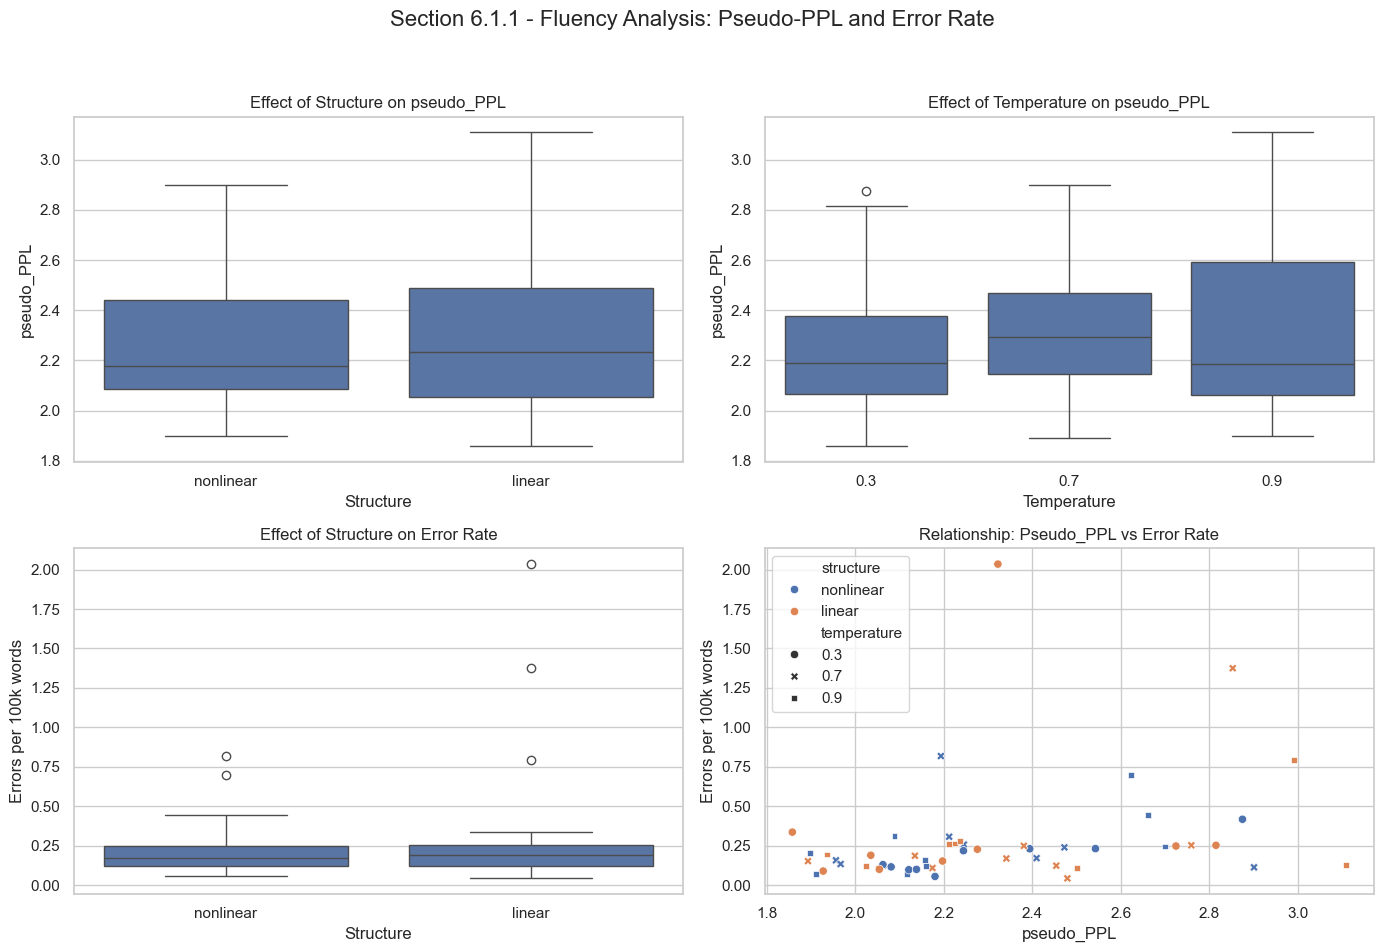

In [2]:
# Filter out only system (non-baseline) outputs
df_main = df[df["is_baseline"] == False]

# Select relevant fluency-related fields
fluency_df = df_main[["structure", "temperature", "pseudo_ppl", "err_per_100w"]]

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["axes.unicode_minus"] = False  # For minus sign display

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Section 6.1.1 - Fluency Analysis: Pseudo-PPL and Error Rate", fontsize=16)

# --- Plot 1: Boxplot of pseudo_ppl by structure ---
sns.boxplot(x="structure", y="pseudo_ppl", data=fluency_df, ax=axes[0, 0])
axes[0, 0].set_title("Effect of Structure on pseudo_PPL")
axes[0, 0].set_xlabel("Structure")
axes[0, 0].set_ylabel("pseudo_PPL")

# --- Plot 2: Boxplot of pseudo_ppl by temperature ---
sns.boxplot(x="temperature", y="pseudo_ppl", data=fluency_df, ax=axes[0, 1])
axes[0, 1].set_title("Effect of Temperature on pseudo_PPL")
axes[0, 1].set_xlabel("Temperature")
axes[0, 1].set_ylabel("pseudo_PPL")

# --- Plot 3: Boxplot of err_per_100w by structure ---
sns.boxplot(x="structure", y="err_per_100w", data=fluency_df, ax=axes[1, 0])
axes[1, 0].set_title("Effect of Structure on Error Rate")
axes[1, 0].set_xlabel("Structure")
axes[1, 0].set_ylabel("Errors per 100k words")

# --- Plot 4: Scatterplot of pseudo_ppl vs err_per_100w ---
sns.scatterplot(
    x="pseudo_ppl",
    y="err_per_100w",
    hue="structure",
    style="temperature",
    data=fluency_df,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Relationship: Pseudo_PPL vs Error Rate")
axes[1, 1].set_xlabel("pseudo_PPL")
axes[1, 1].set_ylabel("Errors per 100k words")

# Final layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("6.1.1_fluency_analysis.png")  # Save figure
plt.show()  # Optional: Show inline


/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/3060093288.py:73: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/3060093288.py:92: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




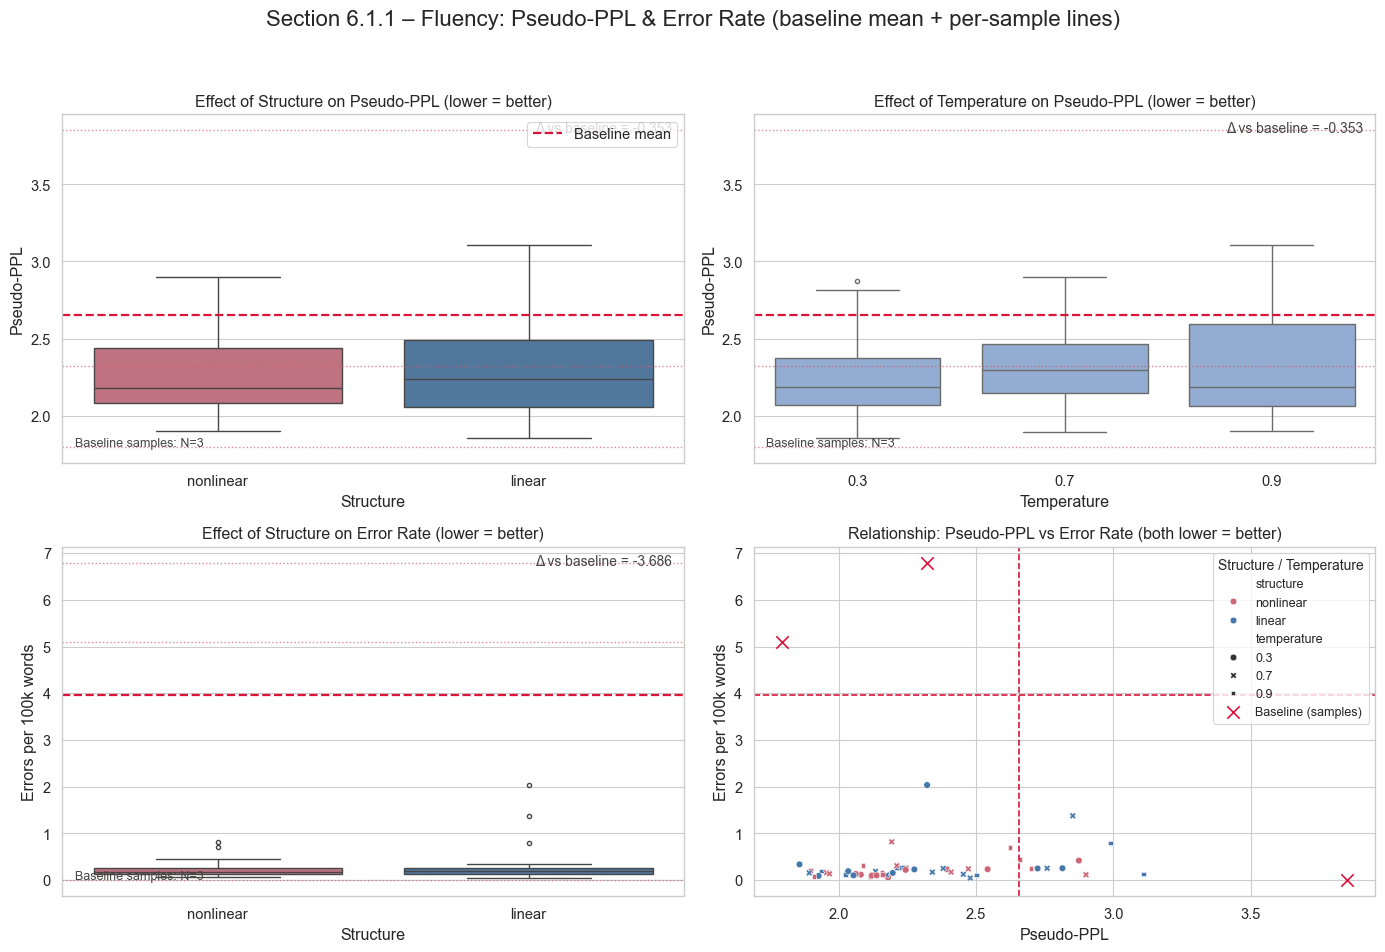

In [35]:
# === Section 6.1.1 – Fluency: add per-sample baseline overlays ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- helpers ----------
def robust_split(df, numeric_cols=()):
    data = df.copy()
    if data["is_baseline"].dtype != bool:
        data["is_baseline"] = (
            data["is_baseline"].astype(str).str.strip().str.lower().isin(["true","1","yes"])
        )
    for c in numeric_cols:
        if c in data.columns:
            data[c] = pd.to_numeric(data[c], errors="coerce")
    return data[data["is_baseline"] == False].copy(), data[data["is_baseline"] == True].copy()

def baseline_mean(bdf, col):
    s = pd.to_numeric(bdf[col], errors="coerce").dropna()
    return s.mean() if len(s) else np.nan

def add_baseline_mean(ax, mu, color="crimson", label="Baseline mean"):
    if not np.isnan(mu):
        ax.axhline(mu, color=color, linestyle="--", linewidth=1.6, label=label)

def add_baseline_samples(ax, samples, color="#d55a6a", label="Baseline (per sample)"):
    """Draw a thin dotted line for each baseline sample value on y-axis."""
    if samples is None or len(samples) == 0:
        return
    # Keep x-range before drawing
    x0, x1 = ax.get_xlim()
    for i, v in enumerate(samples):
        if np.isnan(v): 
            continue
        # light dotted lines for each sample
        ax.hlines(y=v, xmin=x0, xmax=x1, colors=color, linestyles=":", linewidth=1.0, alpha=0.7)
    ax.set_xlim(x0, x1)
    # Add a small annotation for N
    ax.text(0.02, 0.04, f"Baseline samples: N={len(samples)}", transform=ax.transAxes,
            fontsize=9, color="#444", ha="left", va="bottom")

def annotate_delta(ax, sys_values, bl_mu, where="upper right"):
    if np.isnan(bl_mu) or len(sys_values) == 0: 
        return
    delta = np.nanmean(pd.to_numeric(sys_values, errors="coerce")) - bl_mu
    x = 0.98 if "right" in where else 0.02
    y = 0.98 if "upper" in where else 0.02
    ax.text(x, y, f"Δ vs baseline = {delta:+.3f}", transform=ax.transAxes,
            ha="right" if "right" in where else "left",
            va="top" if "upper" in where else "bottom",
            fontsize=10, color="#444")

# ---------- prepare ----------
numeric_cols = ["temperature", "pseudo_ppl", "err_per_100w"]
system_df, baseline_df = robust_split(df, numeric_cols=numeric_cols)

ppl_mu  = baseline_mean(baseline_df, "pseudo_ppl")
err_mu  = baseline_mean(baseline_df, "err_per_100w")
ppl_samples = baseline_df["pseudo_ppl"].dropna().tolist()
err_samples = baseline_df["err_per_100w"].dropna().tolist()

sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.2)
palette = {"linear": "#4477AA", "nonlinear": "#CC6677"}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Section 6.1.1 – Fluency: Pseudo-PPL & Error Rate (baseline mean + per-sample lines)",
             fontsize=16)

# --- Plot 1: PPL by structure ---
ax = axes[0, 0]
sns.boxplot(x="structure", y="pseudo_ppl", data=system_df, ax=ax, palette=palette, fliersize=3)
ax.set_title("Effect of Structure on Pseudo-PPL (lower = better)")
ax.set_xlabel("Structure"); ax.set_ylabel("Pseudo-PPL")
add_baseline_mean(ax, ppl_mu)
add_baseline_samples(ax, ppl_samples)
annotate_delta(ax, system_df["pseudo_ppl"], ppl_mu)
ax.legend(loc="upper right")

# --- Plot 2: PPL by temperature ---
ax = axes[0, 1]
sns.boxplot(x="temperature", y="pseudo_ppl", data=system_df, ax=ax, color="#88aadd", fliersize=3)
ax.set_title("Effect of Temperature on Pseudo-PPL (lower = better)")
ax.set_xlabel("Temperature"); ax.set_ylabel("Pseudo-PPL")
add_baseline_mean(ax, ppl_mu)
add_baseline_samples(ax, ppl_samples)
annotate_delta(ax, system_df["pseudo_ppl"], ppl_mu)

# --- Plot 3: Error rate by structure ---
ax = axes[1, 0]
sns.boxplot(x="structure", y="err_per_100w", data=system_df, ax=ax, palette=palette, fliersize=3)
ax.set_title("Effect of Structure on Error Rate (lower = better)")
ax.set_xlabel("Structure"); ax.set_ylabel("Errors per 100k words")
add_baseline_mean(ax, err_mu)
add_baseline_samples(ax, err_samples)
annotate_delta(ax, system_df["err_per_100w"], err_mu)

# --- Plot 4: PPL vs Error rate + baseline points (red 'x') ---
ax = axes[1, 1]
sns.scatterplot(
    x="pseudo_ppl", y="err_per_100w",
    hue="structure", style="temperature",
    palette=palette, data=system_df, ax=ax
)
ax.set_title("Relationship: Pseudo-PPL vs Error Rate (both lower = better)")
ax.set_xlabel("Pseudo-PPL"); ax.set_ylabel("Errors per 100k words")
# baseline crosshair at mean
if not np.isnan(ppl_mu): ax.axvline(ppl_mu, color="crimson", linestyle="--", linewidth=1.2)
if not np.isnan(err_mu): ax.axhline(err_mu, color="crimson", linestyle="--", linewidth=1.2)
# plot each baseline sample as red 'x'
if {"pseudo_ppl","err_per_100w"}.issubset(baseline_df.columns):
    ax.scatter(baseline_df["pseudo_ppl"], baseline_df["err_per_100w"],
               marker="x", color="crimson", s=80, label="Baseline (samples)")
ax.legend(loc="best", title="Structure / Temperature", fontsize=9, title_fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("6.1.1_fluency_with_baseline_samples.png", dpi=300)
plt.show()


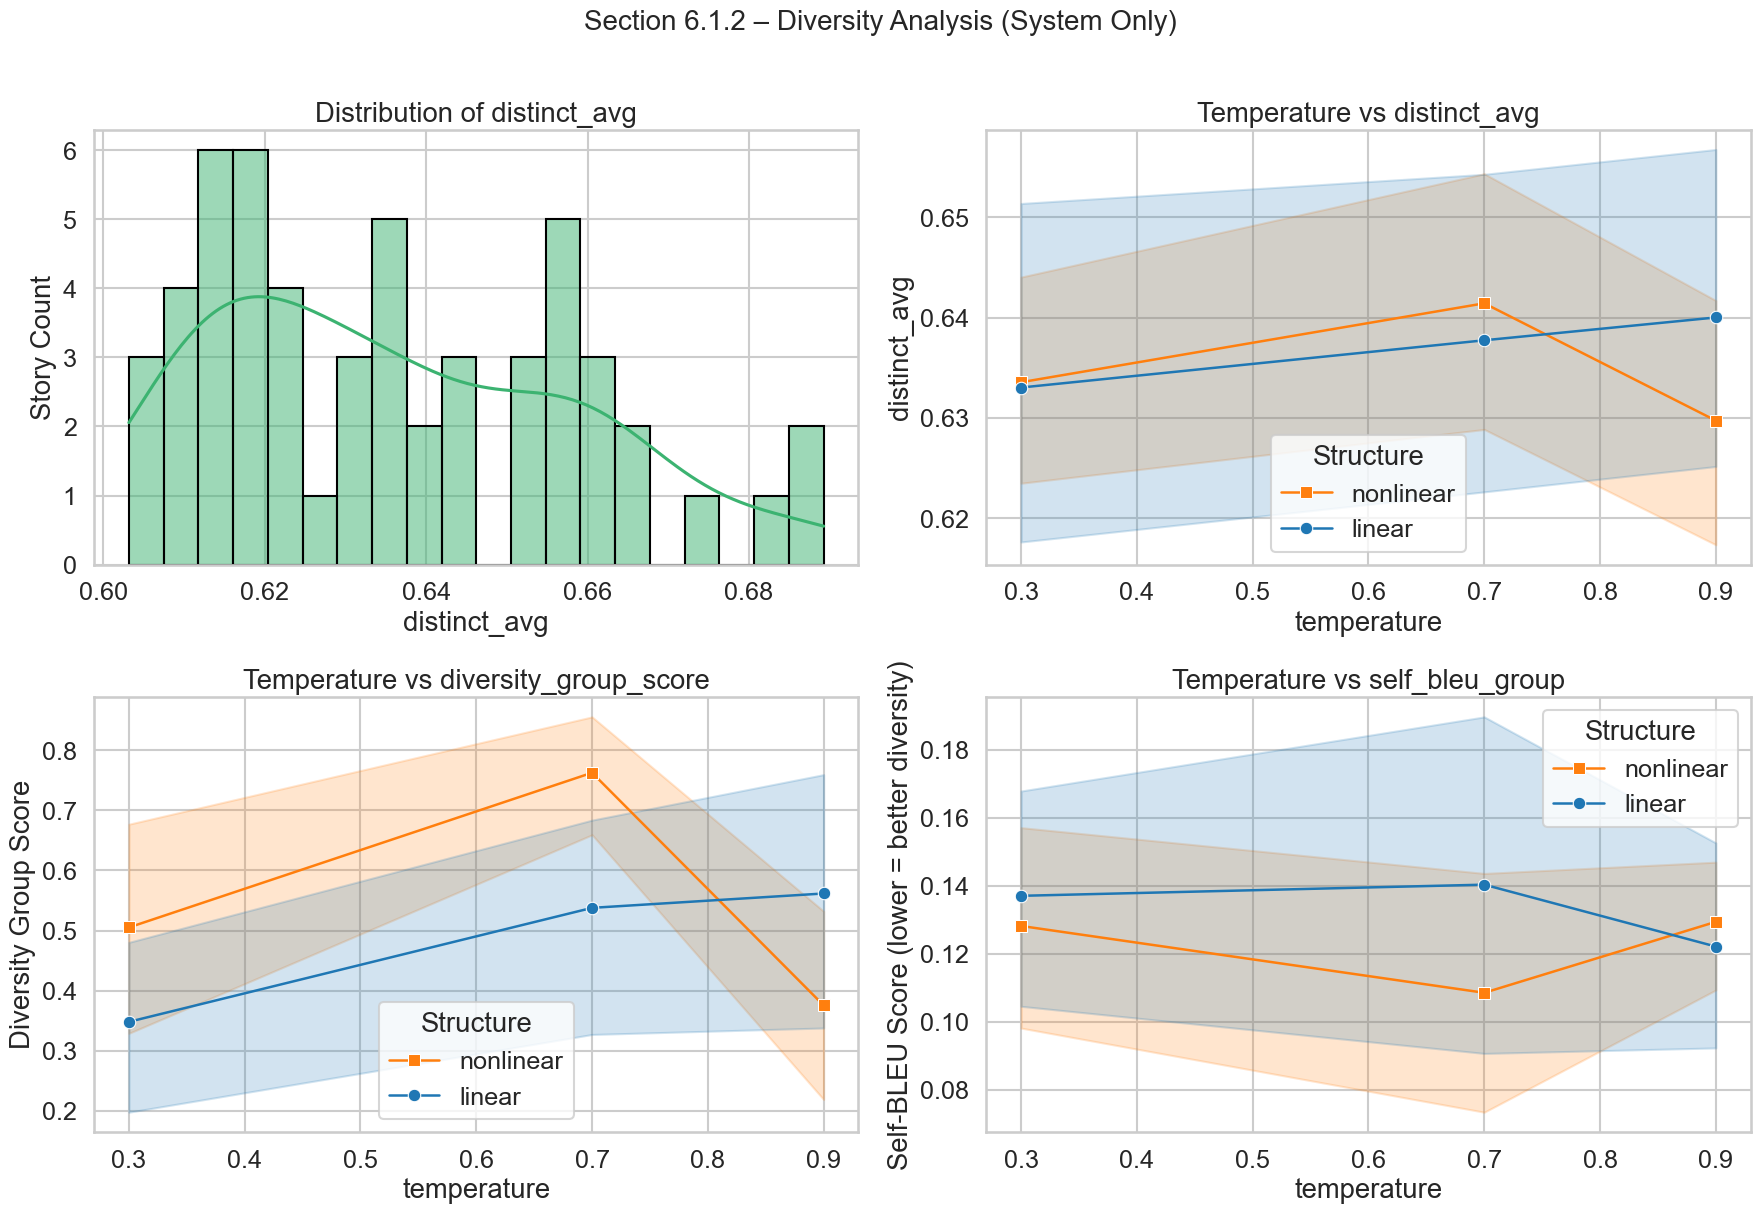

In [3]:
df = df[df["is_baseline"] == False]

# Set plot aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.1)

# Color and marker settings for consistency
palette = {"linear": "#1f77b4", "nonlinear": "#ff7f0e"}  # blue and orange
markers = {"linear": "o", "nonlinear": "s"}

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Section 6.1.2 – Diversity Analysis (System Only)", fontsize=20, y=1.02)

# --- Plot 1: Histogram of distinct_avg ---
sns.histplot(
    data=df, x="distinct_avg", bins=20, kde=True, ax=axes[0, 0],
    color="mediumseagreen", edgecolor='black'
)
axes[0, 0].set_title("Distribution of distinct_avg")
axes[0, 0].set_xlabel("distinct_avg")
axes[0, 0].set_ylabel("Story Count")

# --- Plot 2: Temperature vs distinct_avg by structure ---
sns.lineplot(
    data=df, x="temperature", y="distinct_avg", hue="structure", style="structure",
    palette=palette, markers=markers, dashes=False, ax=axes[0, 1], linewidth=1.8
)
axes[0, 1].set_title("Temperature vs distinct_avg")
axes[0, 1].set_ylabel("distinct_avg")
axes[0, 1].legend(title="Structure")

# --- Plot 3: Temperature vs diversity_group_score by structure ---
sns.lineplot(
    data=df, x="temperature", y="diversity_group_score", hue="structure", style="structure",
    palette=palette, markers=markers, dashes=False, ax=axes[1, 0], linewidth=1.8
)
axes[1, 0].set_title("Temperature vs diversity_group_score")
axes[1, 0].set_ylabel("Diversity Group Score")
axes[1, 0].legend(title="Structure")

# --- Plot 4: Temperature vs self_bleu_group by structure ---
sns.lineplot(
    data=df, x="temperature", y="self_bleu_group", hue="structure", style="structure",
    palette=palette, markers=markers, dashes=False, ax=axes[1, 1], linewidth=1.8
)
axes[1, 1].set_title("Temperature vs self_bleu_group")
axes[1, 1].set_ylabel("Self-BLEU Score (lower = better diversity)")
axes[1, 1].legend(title="Structure")

# Final layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Leave space for suptitle
plt.savefig("6.1.2_diversity_analysis_v2.png")
plt.show()

/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/2596340340.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


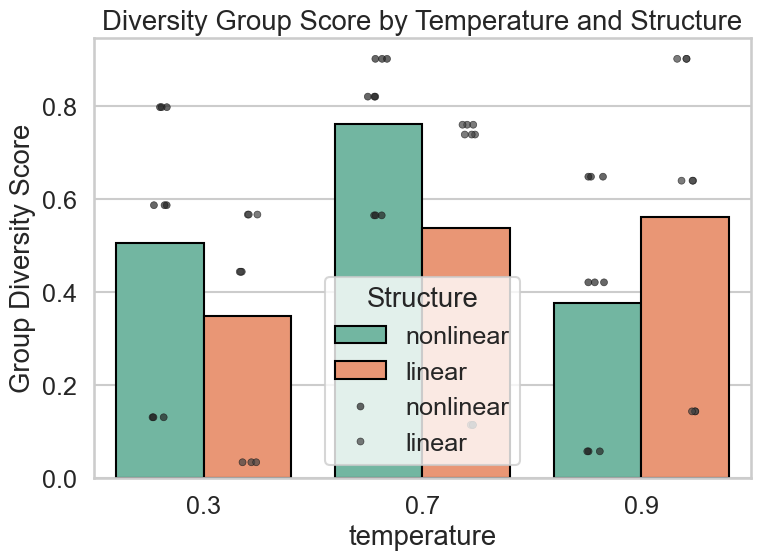

In [4]:
# Bar + Dot plot for diversity_group_score
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Draw bar (mean)
sns.barplot(
    data=df,
    x="temperature",
    y="diversity_group_score",
    hue="structure",
    ci=None,
    palette="Set2",
    edgecolor="black"
)

# Overlay actual data points (small-n visibility)
sns.stripplot(
    data=df,
    x="temperature",
    y="diversity_group_score",
    hue="structure",
    dodge=True,
    palette="dark:#444444",
    alpha=0.7,
    linewidth=0.5
)

plt.title("Diversity Group Score by Temperature and Structure")
plt.ylabel("Group Diversity Score")
plt.legend(title="Structure")
plt.tight_layout()


/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/3403802064.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


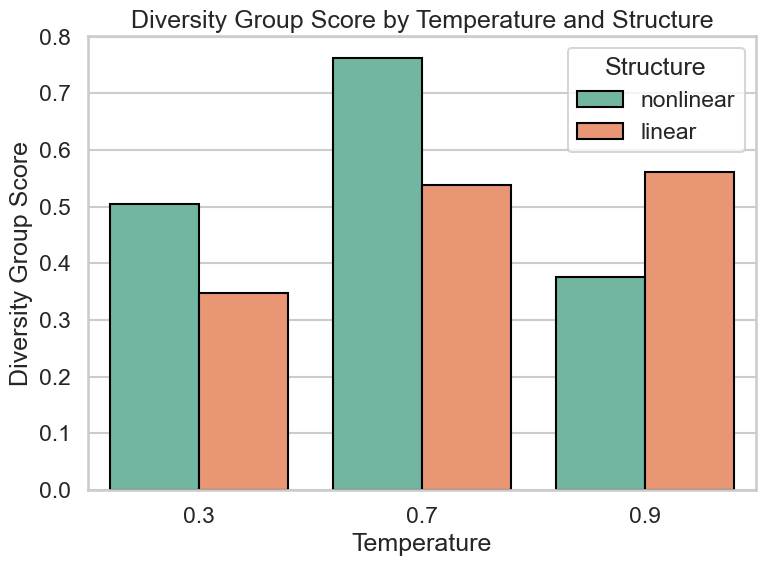

In [5]:
# Set seaborn style
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Initialize the figure
plt.figure(figsize=(8, 6))

# Plot bar chart only (no error bars, no data points)
sns.barplot(
    data=df,
    x="temperature",
    y="diversity_group_score",     # <- You can switch to other metrics here
    hue="structure",
    ci=None,
    palette="Set2",
    edgecolor="black"
)

# Aesthetics
plt.title("Diversity Group Score by Temperature and Structure")
plt.xlabel("Temperature")
plt.ylabel("Diversity Group Score")
plt.legend(title="Structure", loc="upper right")
plt.tight_layout()
plt.savefig("6.1.2_group_score_bar_only.png")
plt.show()



'6.1.3_coherence_analysis.png'

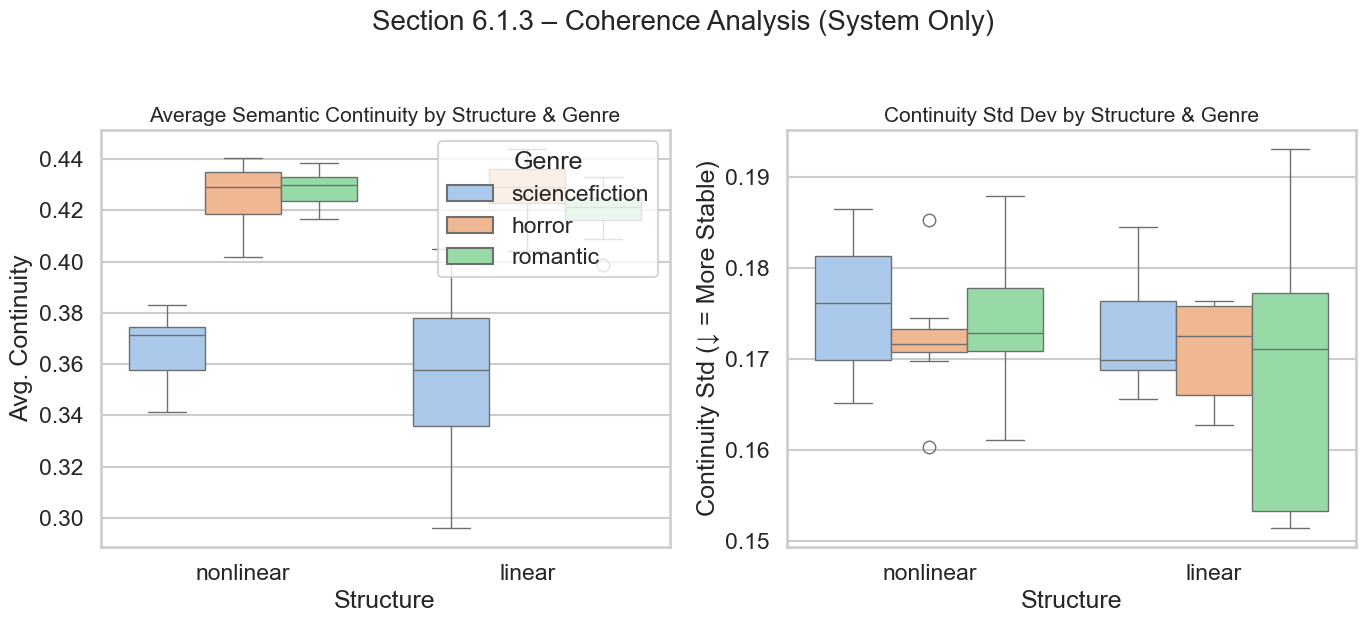

In [6]:

# 设置样式
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.0)

# 提取连贯性相关字段
coherence_df = df[[
    "structure", "genre",
    "avg_semantic_continuity", "semantic_continuity_std"
]]

# 配色方案
palette = {"linear": "#7aaed6", "nonlinear": "#f4a582"}

# 创建图像
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Section 6.1.3 – Coherence Analysis (System Only)", fontsize=20, y=1.05)

# 图1：平均语义连续性
sns.boxplot(
    data=coherence_df,
    x="structure", y="avg_semantic_continuity",
    hue="genre",
    palette="pastel",
    ax=axes[0]
)
axes[0].set_title("Average Semantic Continuity by Structure & Genre", fontsize=15)
axes[0].set_xlabel("Structure")
axes[0].set_ylabel("Avg. Continuity")
axes[0].legend(title="Genre", loc="upper right")

# 图2：语义连续性的标准差
sns.boxplot(
    data=coherence_df,
    x="structure", y="semantic_continuity_std",
    hue="genre",
    palette="pastel",
    ax=axes[1]
)
axes[1].set_title("Continuity Std Dev by Structure & Genre", fontsize=15)
axes[1].set_xlabel("Structure")
axes[1].set_ylabel("Continuity Std (↓ = More Stable)")
axes[1].legend().remove()

# 布局调整
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("6.1.3_coherence_analysis.png")
"6.1.3_coherence_analysis.png"


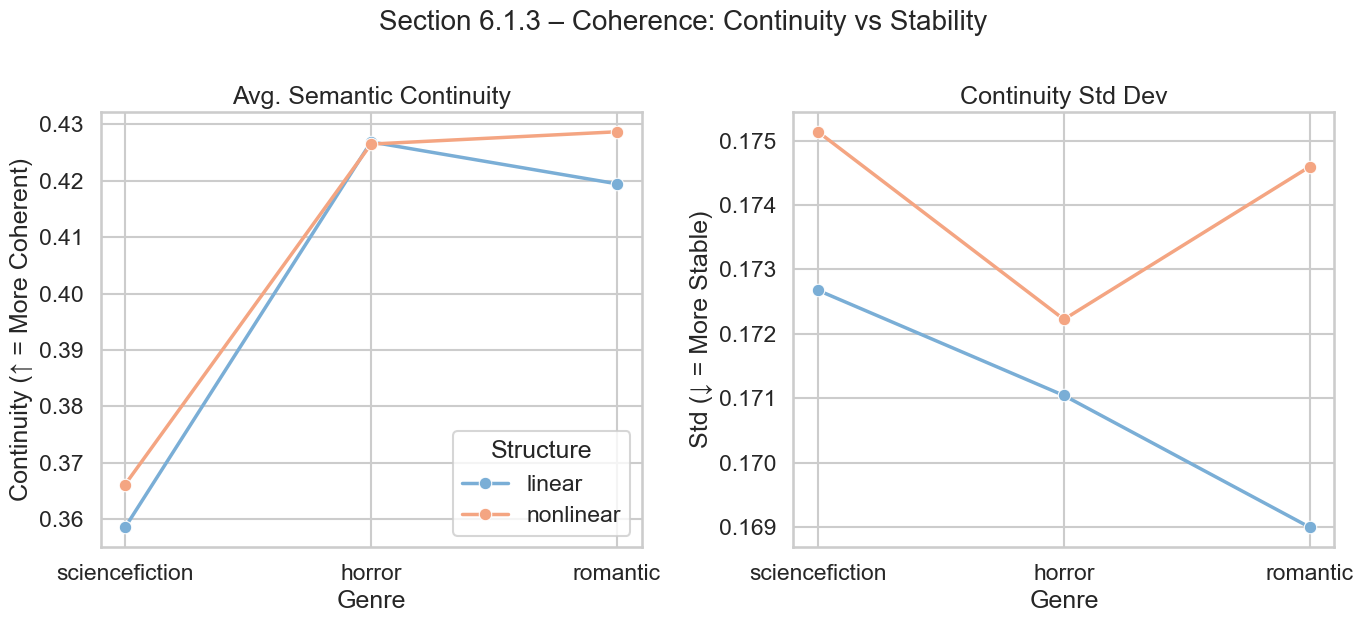

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 预设样式
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.0)

# 加载并处理数据
df = df[df["is_baseline"] == False]

# 对两个指标分别按 genre × structure 求均值
df_mean = df.groupby(["genre", "structure"])[
    ["avg_semantic_continuity", "semantic_continuity_std"]
].mean().reset_index()

# 固定 genre 顺序
genre_order = ["sciencefiction", "horror", "romantic"]
df_mean["genre"] = pd.Categorical(df_mean["genre"], categories=genre_order, ordered=True)

# 创建并列图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Section 6.1.3 – Coherence: Continuity vs Stability", fontsize=20, y=1.05)

# 左图：平均语义连续性
sns.lineplot(
    data=df_mean, x="genre", y="avg_semantic_continuity",
    hue="structure", marker="o", linewidth=2.5,
    palette={"linear": "#7aaed6", "nonlinear": "#f4a582"},
    ax=axes[0]
)
axes[0].set_title("Avg. Semantic Continuity")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Continuity (↑ = More Coherent)")
axes[0].legend(title="Structure", loc="lower right")

# 右图：语义连续性的标准差（稳定性）
sns.lineplot(
    data=df_mean, x="genre", y="semantic_continuity_std",
    hue="structure", marker="o", linewidth=2.5,
    palette={"linear": "#7aaed6", "nonlinear": "#f4a582"},
    ax=axes[1]
)
axes[1].set_title("Continuity Std Dev")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Std (↓ = More Stable)")
axes[1].legend().remove()  # 避免重复图例

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig("6.1.3_continuity_vs_stability_lineplot.png")
plt.show()


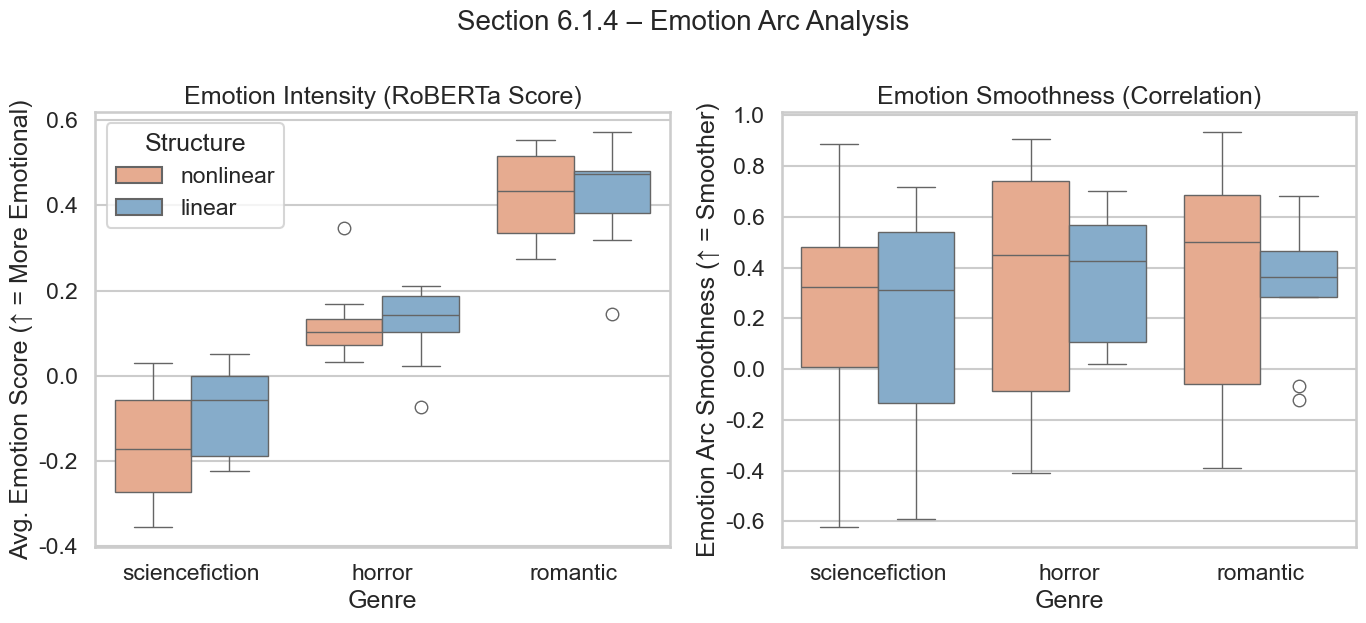

In [8]:

df = df[df["is_baseline"] == False]

# 统一 genre 顺序
genre_order = ["sciencefiction", "horror", "romantic"]
df["genre"] = pd.Categorical(df["genre"], categories=genre_order, ordered=True)

# 设置样式
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.0)
palette = {"linear": "#7aaed6", "nonlinear": "#f4a582"}

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Section 6.1.4 – Emotion Arc Analysis", fontsize=20, y=1.05)

# 左图：roberta_avg_score（平均情绪强度） vs genre
sns.boxplot(
    data=df, x="genre", y="roberta_avg_score", hue="structure",
    palette=palette, ax=axes[0]
)
axes[0].set_title("Emotion Intensity (RoBERTa Score)")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Avg. Emotion Score (↑ = More Emotional)")
axes[0].legend(title="Structure", loc="upper left")

# 右图：emotion_correlation（情绪平滑度） vs genre
sns.boxplot(
    data=df, x="genre", y="emotion_correlation", hue="structure",
    palette=palette, ax=axes[1]
)
axes[1].set_title("Emotion Smoothness (Correlation)")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Emotion Arc Smoothness (↑ = Smoother)")
axes[1].legend().remove()

# 输出图像
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig("6.1.4_emotion_arc_boxplot.png")
plt.show()


/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/4151589955.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["TP Coverage", "LI Diversity"])


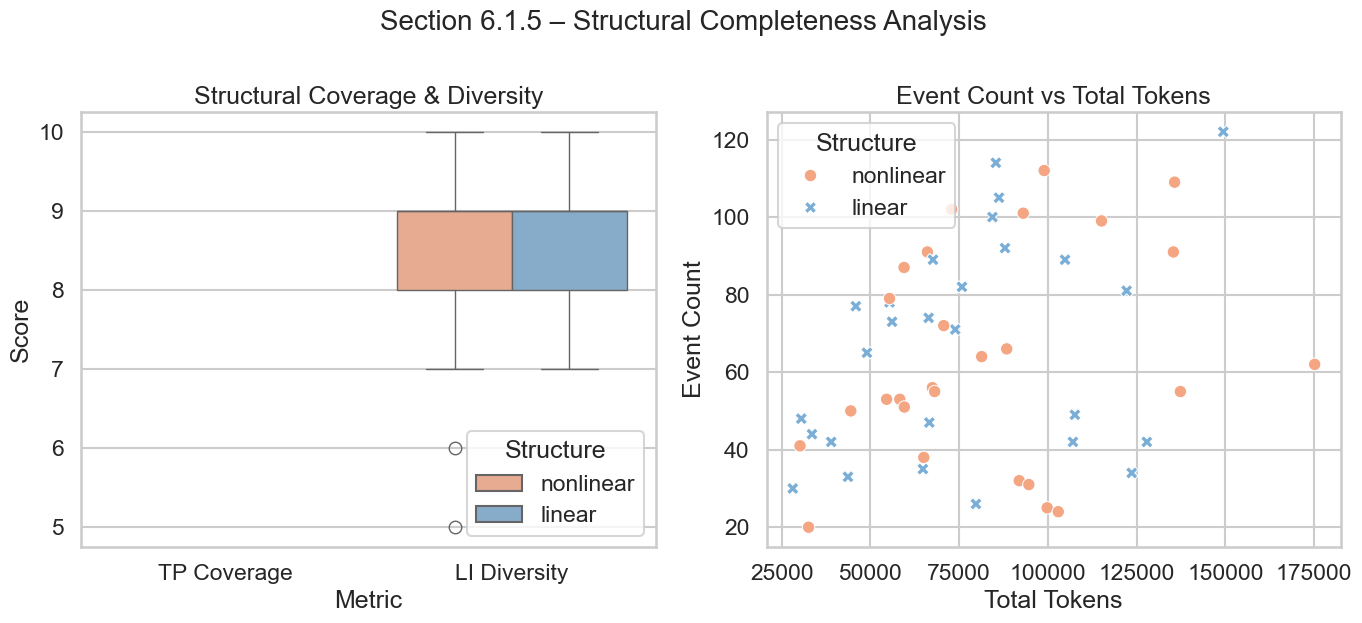

In [9]:
# 强制转换相关列为数值型（防止 melt 后为 object 类型）
df["tp_coverage"] = pd.to_numeric(df["tp_coverage"], errors="coerce")
df["li_function_diversity"] = pd.to_numeric(df["li_function_diversity"], errors="coerce")

# melt 用于将两个结构指标合并为一列
structure_metrics = df[["structure", "tp_coverage", "li_function_diversity"]].melt(id_vars="structure")

# 重画图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Section 6.1.5 – Structural Completeness Analysis", fontsize=20, y=1.05)

# 子图1：结构覆盖 + 多功能性（boxplot）
sns.boxplot(
    data=structure_metrics,
    x="variable", y="value", hue="structure", palette=palette,
    ax=axes[0]
)
axes[0].set_title("Structural Coverage & Diversity")
axes[0].set_xlabel("Metric")
axes[0].set_ylabel("Score")
axes[0].set_xticklabels(["TP Coverage", "LI Diversity"])
axes[0].legend(title="Structure", loc="lower right")

# 子图2：事件密度（事件数 vs 总 tokens）
sns.scatterplot(
    data=df,
    x="tokens_total", y="total_events",
    hue="structure", style="structure",
    palette=palette, s=80,
    ax=axes[1]
)
axes[1].set_title("Event Count vs Total Tokens")
axes[1].set_xlabel("Total Tokens")
axes[1].set_ylabel("Event Count")
axes[1].legend(title="Structure", loc="upper left")

# 输出图像
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig("6.1.5_structure_analysis_v2.png")
plt.show()


/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/2824157258.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/2824157258.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Linear", "Nonlinear"])
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/2824157258.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_20938/2824157258.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



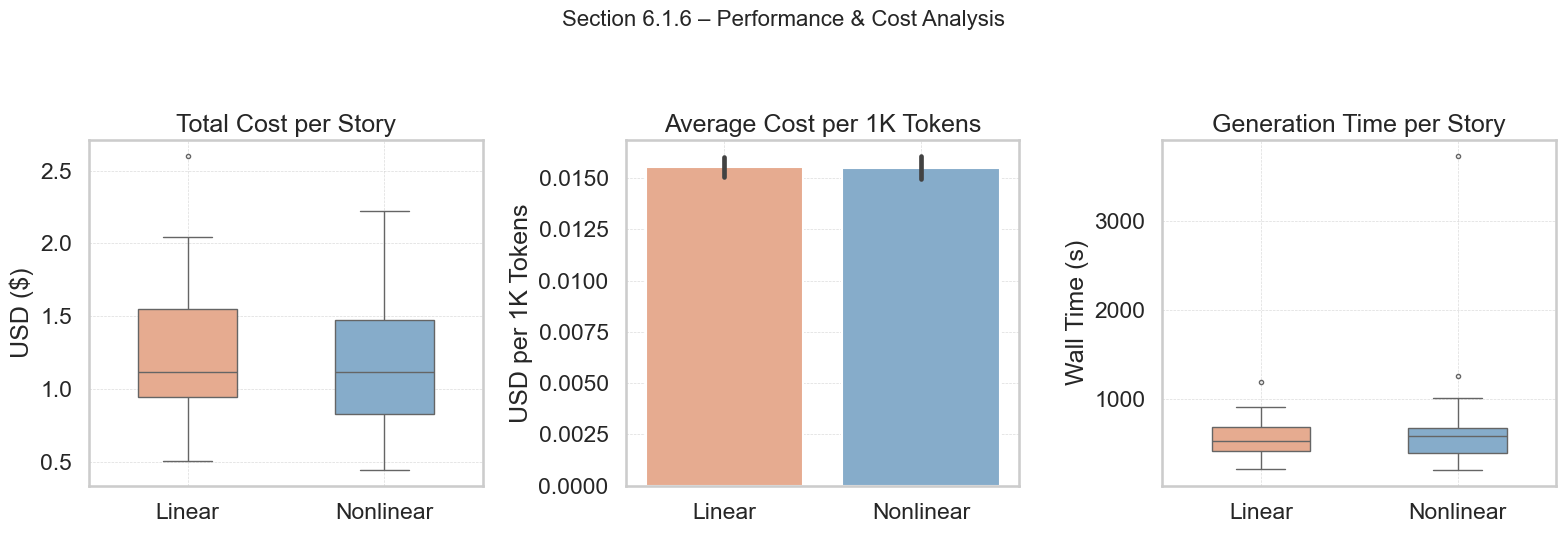

In [10]:
# 修复 barplot 中因 matplotlib 兼容性引发的 width 参数冲突问题：改为调整 sns.barplot 参数顺序
# 改为更兼容的形式，并重新生成图

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("Section 6.1.6 – Performance & Cost Analysis", fontsize=16, y=1.08)

# Ensure cost_per_1k exists
if "cost_per_1k" not in df.columns:
    df["cost_per_1k"] = df["cost_usd"] / (df["tokens_total"] / 1000)

# 图 1：总成本箱线图
sns.boxplot(
    data=df, x="structure", y="cost_usd", palette=palette, ax=axes[0],
    width=0.5, fliersize=3
)
axes[0].set_title("Total Cost per Story")
axes[0].set_xlabel("")
axes[0].set_ylabel("USD ($)")
axes[0].set_xticklabels(["Linear", "Nonlinear"])

# 图 2：单位生成成本柱状图（每千 token）
sns.barplot(
    data=df, x="structure", y="cost_per_1k", ax=axes[1],
    estimator=np.mean, ci="sd", palette=palette
)
axes[1].set_title("Average Cost per 1K Tokens")
axes[1].set_xlabel("")
axes[1].set_ylabel("USD per 1K Tokens")
axes[1].set_xticklabels(["Linear", "Nonlinear"])

# 图 3：Wall Time 箱线图
sns.boxplot(
    data=df, x="structure", y="wall_time_sec", palette=palette, ax=axes[2],
    width=0.5, fliersize=3
)
axes[2].set_title("Generation Time per Story")
axes[2].set_xlabel("")
axes[2].set_ylabel("Wall Time (s)")
axes[2].set_xticklabels(["Linear", "Nonlinear"])

# 添加网格线
for ax in axes:
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# 布局调整
plt.tight_layout()
plt.subplots_adjust(top=0.82)
plt.savefig("6.1.6_perf_academic_final.png", dpi=300)
plt.show()


In [32]:
import os
import pandas as pd
import numpy as np
import plotly.express as px

# 1) Load
df = pd.read_csv("clean.csv")

# 2) Canonicalize
# is_baseline -> bool
df["is_baseline"] = (
    df["is_baseline"].astype(str).str.strip().str.lower().isin(["true","1","yes"])
)

# keys: coerce numerics
df["temperature"] = pd.to_numeric(df.get("temperature"), errors="coerce")
df["seed"]        = pd.to_numeric(df.get("seed"), errors="coerce").astype("Int64")

# metrics (only those that truly exist)
metrics = ["distinct_avg","avg_semantic_continuity","roberta_avg_score","tp_coverage"]
metrics = [m for m in metrics if m in df.columns]
for m in metrics:
    df[m] = pd.to_numeric(df[m], errors="coerce")

# split
sys_df = df[df["is_baseline"] == False].copy()
base_df = df[df["is_baseline"] == True].copy()

# if baseline temperature is missing, set to 0.7 (your protocol)
if base_df["temperature"].isna().any():
    base_df.loc[:, "temperature"] = 0.7

# 3) Group & aggregate on the ONLY overlapping keys: temperature + seed
group_cols = ["temperature","seed"]

sys_g  = sys_df.groupby(group_cols, observed=True)[metrics].mean().reset_index()
sys_g["source"] = "system"
base_g = base_df.groupby(group_cols, observed=True)[metrics].mean().reset_index()
base_g["source"] = "baseline"

cmp = pd.concat([sys_g, base_g], ignore_index=True)

# find matched (temperature, seed) pairs that exist on both sides
pairs = cmp.groupby(group_cols)["source"].nunique()
valid_pairs = pairs[pairs == 2].index

# 4) Output dir
outdir = os.path.expanduser("~/Desktop/radar_charts_seed_based")
os.makedirs(outdir, exist_ok=True)

# 5) Save radar charts; PNG if kaleido installed, otherwise HTML
def save_radar_for_pair(t, s):
    sub = cmp[(cmp["temperature"] == t) & (cmp["seed"] == s)][["source"] + metrics]
    rad = sub.melt(id_vars="source", var_name="Metric", value_name="Score")
    title = f"System vs Baseline | T={t} | seed={s}"

    fig = px.line_polar(
        rad, r="Score", theta="Metric", color="source",
        line_close=True, markers=True, template="simple_white",
        color_discrete_map={"system":"#1f77b4","baseline":"#ff7f0e"},
        title=title
    )
    stem = f"T{t}_seed{s}".replace(".","_")
    png = os.path.join(outdir, f"{stem}.png")
    html = os.path.join(outdir, f"{stem}.html")
    try:
        fig.write_image(png, scale=3)      # needs `pip install kaleido`
        print("PNG saved:", png)
    except Exception as e:
        print("PNG export failed -> save HTML instead:", e)
        fig.write_html(html, include_plotlyjs="cdn")
        print("HTML saved:", html)

for (t, s) in valid_pairs:
    save_radar_for_pair(t, s)

print("Done. Charts in:", outdir)


PNG saved: /Users/haha/Desktop/radar_charts_seed_based/T0_7_seed1.png
PNG saved: /Users/haha/Desktop/radar_charts_seed_based/T0_7_seed2.png
PNG saved: /Users/haha/Desktop/radar_charts_seed_based/T0_7_seed3.png
Done. Charts in: /Users/haha/Desktop/radar_charts_seed_based
